


# Project 6: Credit Card Churn Prediction Model
Student : Cameron Presley

Version : 2021.05.13

email : cameron@ignitedzen.net

Dataset Filename : BankChurners.csv

# Background and Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards


# Objective

1.  Explore and visualize the dataset.

2.  Build a classification model to predict if the customer is going to churn or not

3.  Optimize the model using appropriate techniques

4.  Generate a set of insights and recommendations that will help the bank

 

# Data Dictionary

* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0 [PREDICTOR VARIABLE]
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents 
* Education_Level: Educational Qualification of the account holder 
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio


# Outline, Actions, and Key Deliverables


- <a href = #link1>1.  Exploratory Data Analysis </a>

    - Univariate analysis
    - Bivariate analysis
    - Multivariate analysis

- <a href = #link2>2.  Insights based on EDA </a>

- <a href = #link3>3.  Data Pre-processing </a>

    - Prepare the data for analysis 
    - Missing value Treatment, Outlier Detection/Treatment, Feature Engineering, Data Prep, Model Split


- <a href = #link4>4.  Model building & 5. Tuning </a>

- <a href = #link6>6.  Model performance evaluation </a>

- <a href = #link7>7.  Actionable Insights & Recommendations </a>








In [1]:
# In standard Markdown, place an anchor <a name="abcd"></a> 
#where you want to link to and refer to it on the same page by [link text](#abcd)

# Build header + import necessary libraries : numpy, pandas, seaborn, matplotlib.pyplot, etc., read in the dataset, set some styling

In [6]:
!pip3 install sklearn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.9 MB 3.5 MB/s eta 0:00:01


In [7]:
#Build a basic program header

student = 'Cameron Presley'
version = '2021.05.13'
email = 'cameron@ignitedzen.net'
title =  'Project 6:  Credit Card Prediction Model'
dataset_filename = 'BankChurners.csv'

print ('Project Title :', title)
print ('')
print ('Student :', student)
print ('')
print ('Version :', version)
print ('')
print ('email :', email)
print ('')
print ('Dataset Filename :', dataset_filename)
print ('')


#Import the neccesary libraries and avoid warnings

import warnings
warnings.filterwarnings('ignore')

#import libraries for working arrays, dataframes, and performing linear alegebra operations
import numpy as np 
import pandas as pd 
import math

#library needed to read .xlsx files
import xlrd 

#data visualization librariers
import matplotlib.pyplot as plt
import seaborn as sns

#statistical analysis libraries
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols # for ANOVA
from statsmodels.stats.anova import anova_lm # for ANOVA
from scipy.stats import chi2_contingency # for CHI SQUARE
from scipy.stats import ttest_rel #paired T-test
from scipy.stats import levene #Levene's test

#data cleansing tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import missingno as mi

#model building libraries and tools

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

# --> CLASSIFIER MODELS

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# --> REGRESSOR MODELS

from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier


# Removes the limit from the number of displayed columns and rows to increase df visibility
# uncap the cols, limit the rows
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 50)

#use seaborn styling
sns.set_style("whitegrid")


#Load Dataset

data = pd.read_csv(dataset_filename)


# create copy of original data

df = data.copy()


#Determine the basic shape of the data - # of rows and # of cols

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

row_num = df.shape[0]
print ('row_num =', row_num)


Project Title : Project 6:  Credit Card Prediction Model

Student : Cameron Presley

Version : 2021.05.13

email : cameron@ignitedzen.net

Dataset Filename : BankChurners.csv

There are 10127 rows and 21 columns.
row_num = 10127


# Initial Data Review

In [8]:
#open up view of columns and increase view of row data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)

#set a seed value to get the same results with each random sampling of the table

np.random.seed(20)
df.sample(n=15)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
3356   708871158  Existing Customer            60      M                1   
1291   708971583  Existing Customer            38      F                2   
1402   710616183  Existing Customer            46      F                3   
8576   813810333  Attrited Customer            50      M                3   
8864   720939933  Attrited Customer            46      F                4   
7744   711909933  Existing Customer            54      M                4   
8577   789613083  Existing Customer            47      M                3   
403    712372158  Existing Customer            45      M                4   
1555   715065483  Existing Customer            45      F                3   
10030  788741733  Existing Customer            53      F                1   
376    772047183  Existing Customer            45      M                4   
8998   712687083  Existing Customer            44      M                3   
440    710519433  Existing Customer            48      M                1   
5171   716890533  Existing Customer            49      F                2   
1348   713371233  Existing Customer            43      F                1   

      Education_Level Marital_Status Income_Category Card_Category  \
3356         Graduate         Single     $60K - $80K        Silver   
1291       Uneducated         Single  Less than $40K          Blue   
1402       Uneducated         Single         Unknown          Blue   
8576    Post-Graduate        Married     $60K - $80K          Blue   
8864          Unknown         Single  Less than $40K          Blue   
7744          Unknown        Married    $80K - $120K          Blue   
8577       Uneducated       Divorced     $60K - $80K          Blue   
403           Unknown        Married         $120K +          Blue   
1555         Graduate       Divorced  Less than $40K          Blue   
10030        Graduate        Married  Less than $40K          Blue   
376       High School        Married     $40K - $60K          Blue   
8998         Graduate        Married     $60K - $80K          Blue   
440           Unknown       Divorced    $80K - $120K          Blue   
5171       Uneducated         Single  Less than $40K          Blue   
1348         Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
3356               42                         4                       3   
1291               29                         3                       3   
1402               33                         5                       3   
8576               45                         6                       4   
8864               33                         5                       3   
7744               42                         3                       3   
8577               41                         2                       3   
403                33                         6                       1   
1555               36                         4                       3   
10030              32                         4                       2   
376                34                         6                       3   
8998               24                         1                       1   
440                36                         3                       1   
5171               36                         6                       2   
1348               31                         5                       1   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
3356                       4       28701.0                    0   
1291                       2        3590.0                 1924   
1402                       4       19995.0                    0   
8576                       3        2049.0                    0   
8864                       5        2879.0                    0   
7744                       1        1621.0        

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are a series of objects that need to be converted into categories.  Some of the integer dtypes may need to be treated as categories as well.

There are 21 variables (columns) and 10,127 entries (rows).  Each of the variables has the same number of rows indicating no obviously missing data.


In [10]:
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

Quick look at the numerical variables indicate:

CLIENTNUM appears to be a list of unique identifiers which will not add value to model building. Will drop it.

Detailed comments regarding other numerical variables will follow in the EDA Insights.



In [11]:
#looking at categorical variables

df.describe(include = ['object']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

There are 6 categorical variables, including our predictor variable, Attrition_Flag.  85% or more of the customers keep their accounts open. Gender is evenly split between Male and Female. There are 7 different Education Levels with Graduates being the most prevalent.  Almost half of the customers are married.  One third have income less than $40K.  There are 6 different income categories.   Initial insights are that the predictor variable and other features are significantly imbalanced.  E.g.,  8,500 of the 10,127 customers represent those who stayed with the company or did not churn.  About 90% + of the customers hold a Blue card.  Need to look at techniques to balance the data set to prevent overfit and underfit, as well as minimize the potential for majority class bias in the model building.



In [12]:
obj_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category'
           ,'Card_Category']
df[obj_cols] = df[obj_cols].astype('category')


# step through each category value and list the unique values in each category

for i in obj_cols:
    print('*'*40)
    print('Unique values for',i, 'are :')
    print(df[i].value_counts())
    print('*'*40);

****************************************
Unique values for Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
****************************************
****************************************
Unique values for Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
****************************************
****************************************
Unique values for Education_Level are :
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
****************************************
****************************************
Unique values for Marital_Status are :
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
****************************************
****************************************
Unique values for Income_Category are :
Less than $40K 

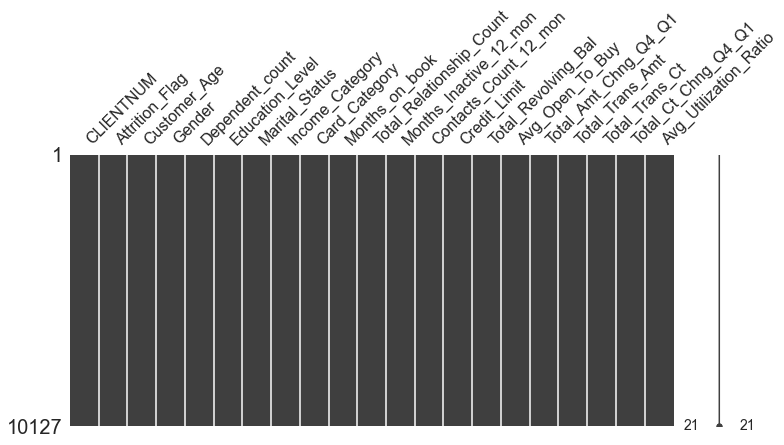

In [13]:
# Visualize the missing data spatially in the dataset

mi.matrix (df, figsize = (12,5));

In [14]:
# checking for counts for obviously missing value counts

df.isna().sum()



CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [15]:
# check  for the unique values
# each row for each column
n = df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64


### initial observations

* CLIENTUM appears to be a unique identifier and will not not add value to model building. Will delete it.
* There is no obviously missing data



In [16]:
del df['CLIENTNUM']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### first glance at the variable data distribution

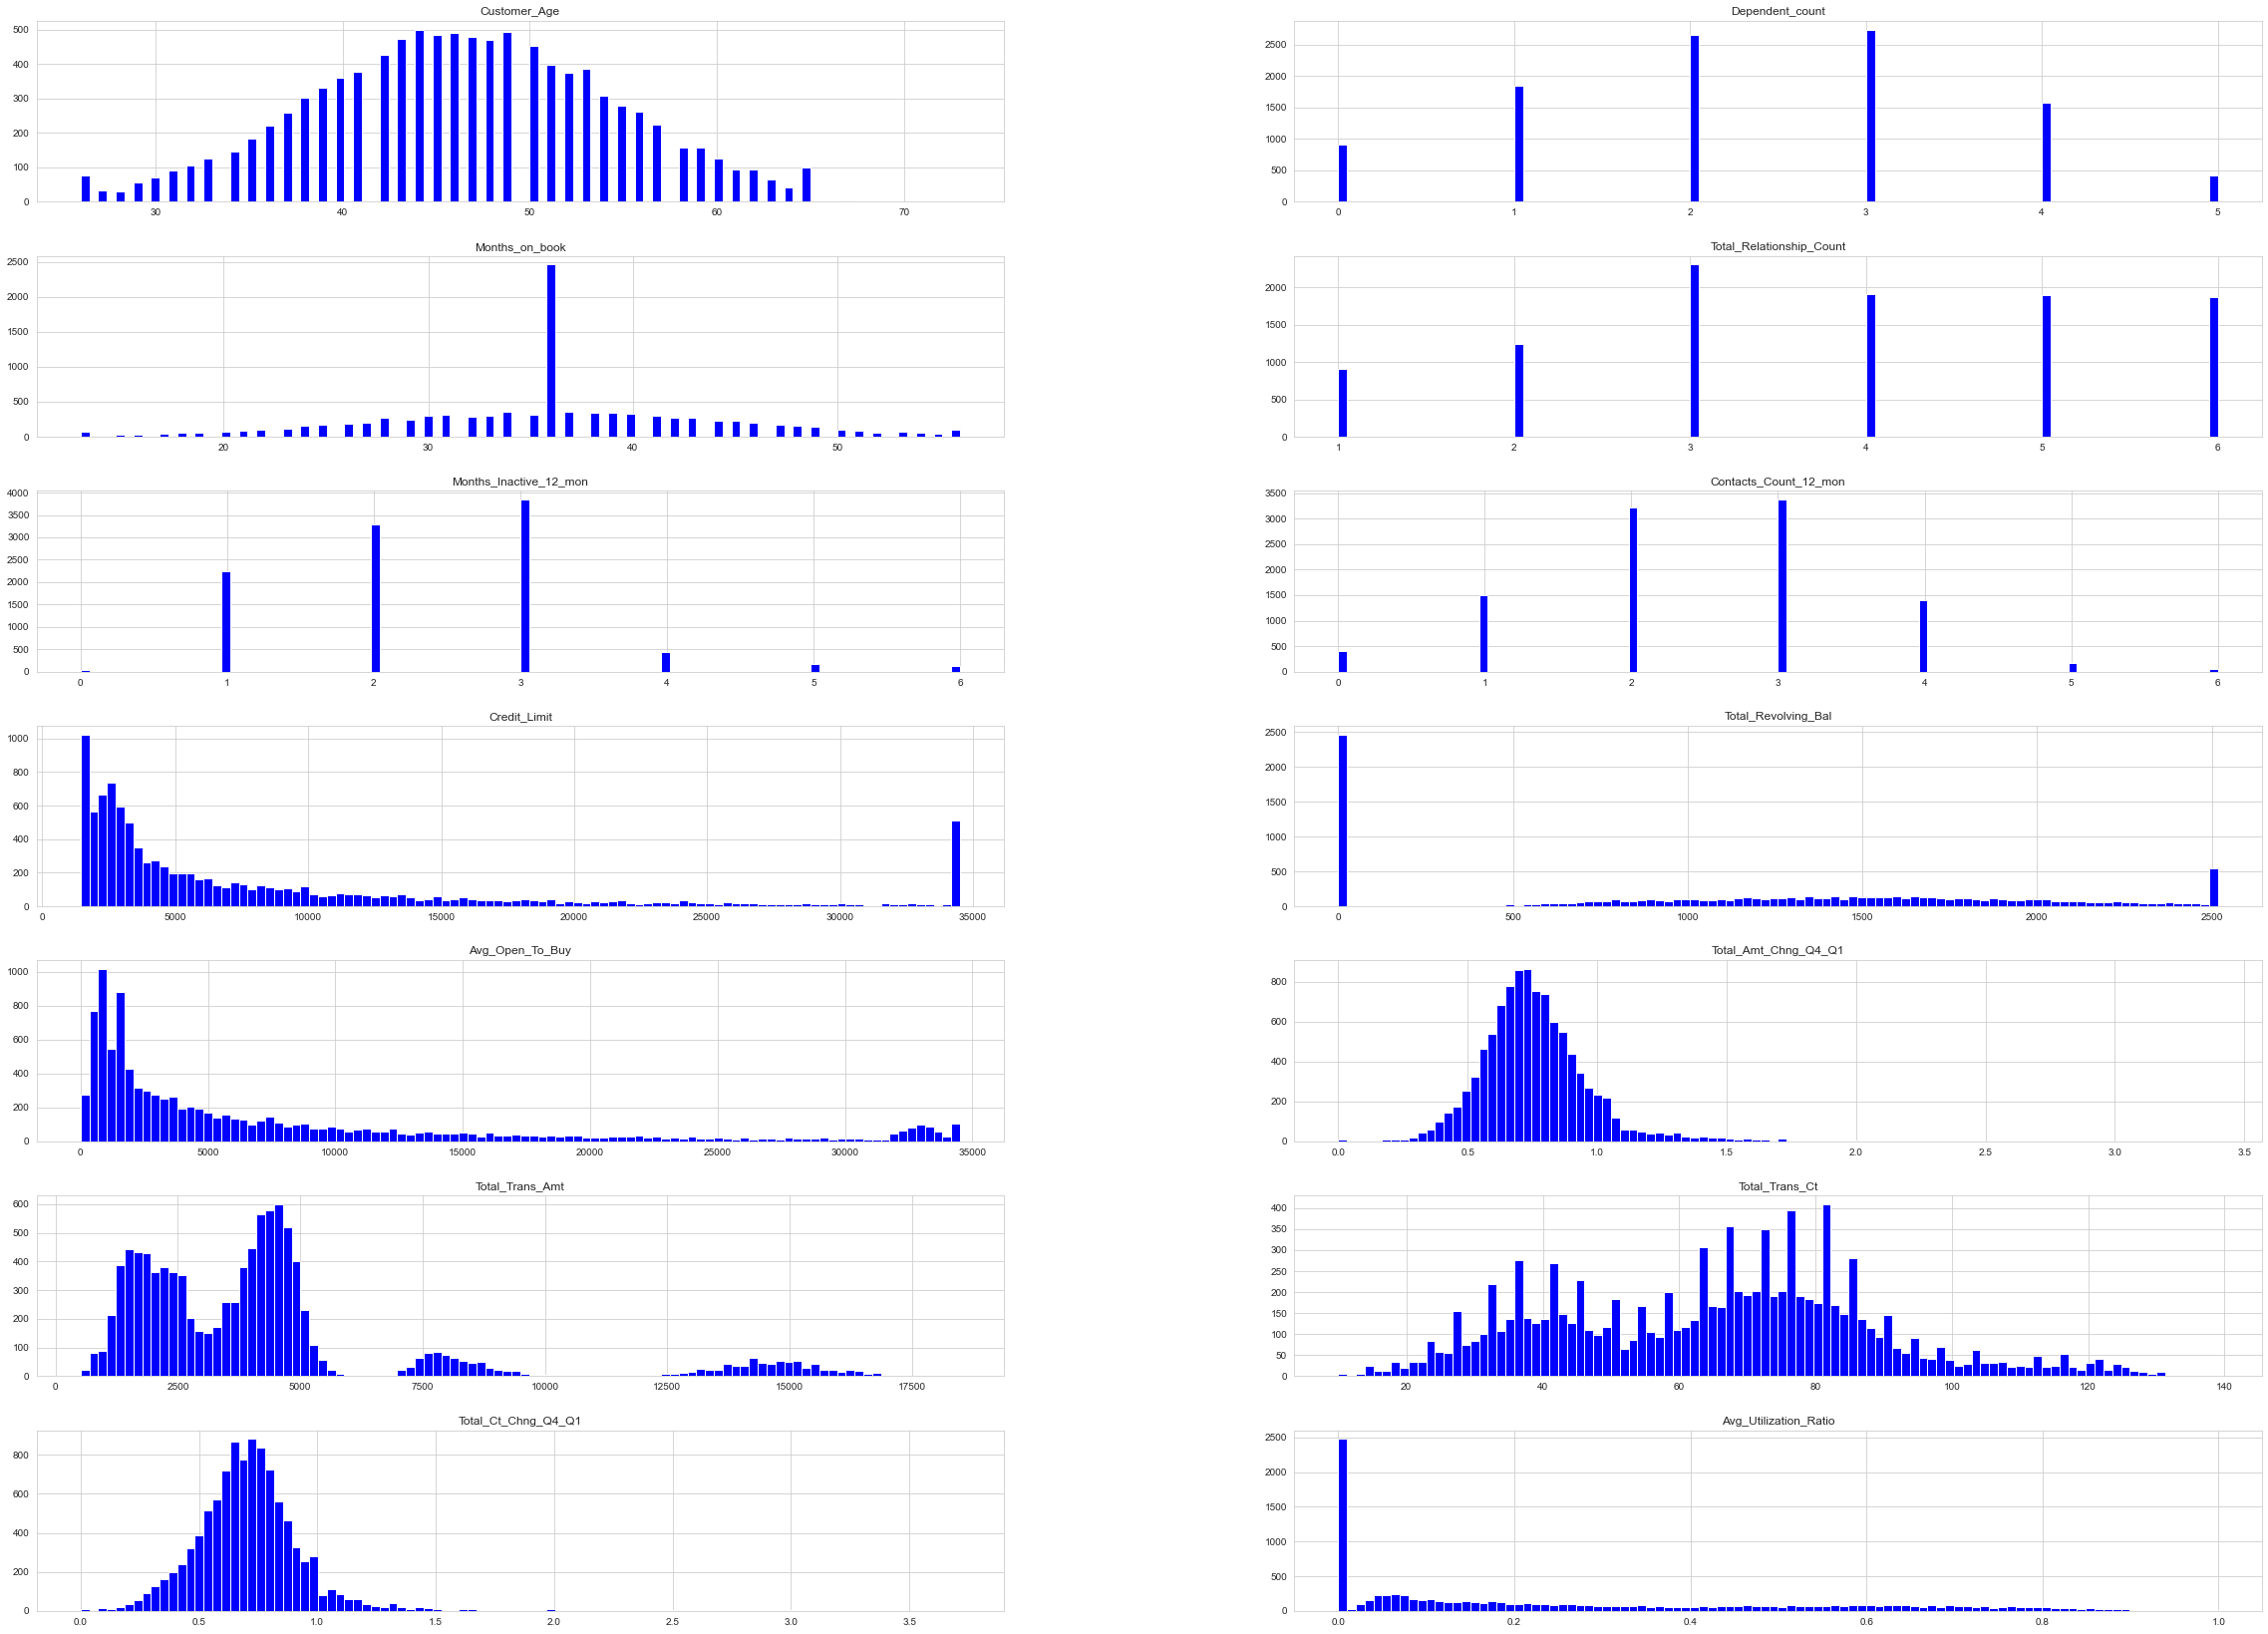

In [17]:
columns = list(df)[0:] #showing all columns
df[columns].hist(stacked=False, bins=100, figsize=(40,64), layout=(15,2), color = 'blue'); 


There is a significant level of skewness across the features.  Will need to apply StandardScaler.

# <a id = "link1"></a> 1.  EDA - UNIVARIATE & BIVARIATE & MULTIVARIATE ANALYSIS

Numerical values

                  
 * Customer_Age                
 * Dependent_count
 * Months_on_book  
 * Total_Relationship_Count  
 * Months_Inactive_12_mon
 * Contacts_Count_12_mon  
 * Total_Revolving_Bal  
 * Avg_Open_To_Buy
 * Total_Amt_Chng_Q4_Q1
 * Total_Trans_Amt
 * Total_Trans_Ct
 * Total_Ct_Chng_Q4_Q1
 * Avg_Utilization_Ratio

# build functions to increase EDA efficiency

## Function for Numerical Variable Analysis

In [18]:
def histogram_boxplot(feature, figsize=(10,5), bins = None):
   
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows -> subplot grid= 2
                                           sharex = True, # shared x-axis on both plots
                                           gridspec_kw = {"height_ratios": (.15, .85)}, 
                                           figsize = figsize 
                                           ) # build 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='tan') # boxplot will show the mean value
    sns.distplot(feature, kde=T, ax=ax_hist2, bins=bins,color = 'red') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='green') # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to histogram to help with assessing skewness
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to histogram to help with assessing skewness

## Function for Categorical Variable Analysis

In [19]:

def bar_perc(plot, feature):
    
    total = len(feature) # count value for column
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # category percentage
        x = p.get_x() + p.get_width() / 2 - 0.05 # plot width
        y = p.get_y() + p.get_height()           # plot height
        ax.annotate(percentage, (x, y), size = 15) # label percentage value
    plt.show() # visualize plot
    


# EDA Univariate Analysis

# Numerical variables review

## Customer_Age

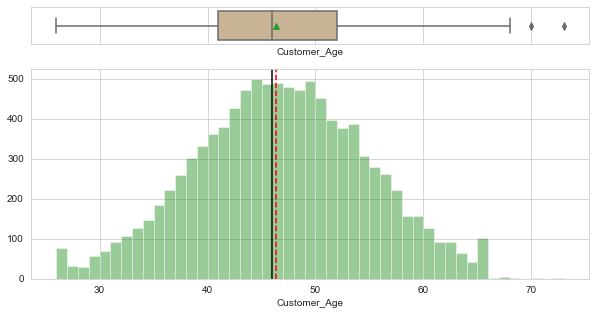

In [20]:
histogram_boxplot(df["Customer_Age"])

In [21]:
miss_vals = df["Customer_Age"].isnull().sum()
print ('*'*100)
print ('There are', df["Customer_Age"].nunique(), 'unigue values:')
print (df["Customer_Age"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Customer_Age'].describe().T

****************************************************************************************************
There are 45 unigue values:
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

## Dependent_count

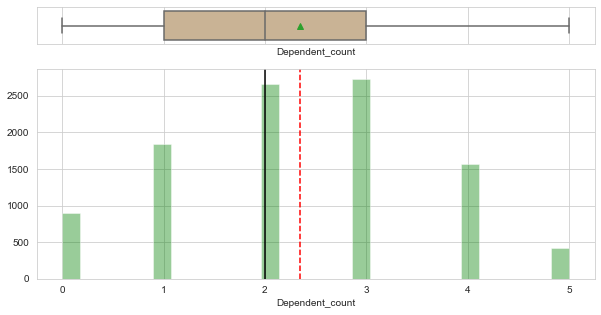

In [17]:
histogram_boxplot(df["Dependent_count"])

In [18]:
miss_vals = df["Dependent_count"].isnull().sum()
print ('*'*100)
print ('There are', df["Dependent_count"].nunique(), 'unique values:')
print (df["Dependent_count"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Dependent_count'].describe().T

****************************************************************************************************
There are 6 unique values:
[3 5 4 2 0 1]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64

## Months_on_book

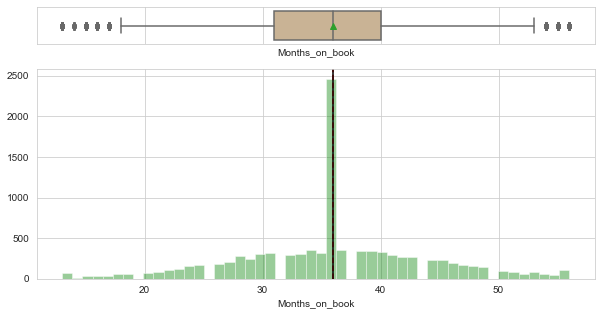

In [19]:
histogram_boxplot(df["Months_on_book"])

In [20]:
miss_vals = df["Months_on_book"].isnull().sum()
print ('*'*100)
print ('There are', df["Months_on_book"].nunique(), 'unique values:')
print (df["Months_on_book"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Months_on_book'].describe().T

****************************************************************************************************
There are 44 unique values:
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

## Total_Relationship_Count

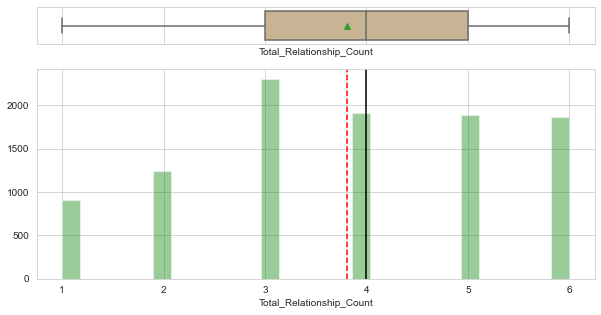

In [21]:
histogram_boxplot(df["Total_Relationship_Count"])

In [22]:
miss_vals = df["Total_Relationship_Count"].isnull().sum()
print ('*'*100)
print ('There are', df["Total_Relationship_Count"].nunique(), 'unique values:')
print (df["Total_Relationship_Count"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Total_Relationship_Count'].describe().T

****************************************************************************************************
There are 6 unique values:
[5 6 4 3 2 1]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64

##  Months_Inactive_12_mon


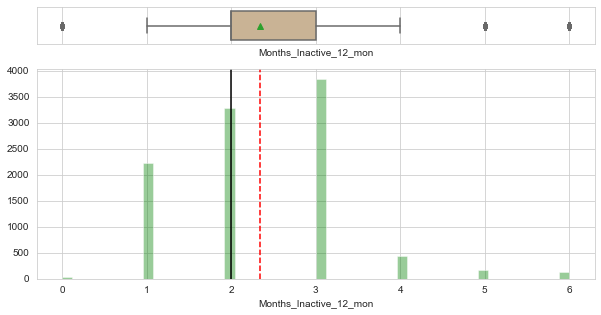

In [23]:
histogram_boxplot(df["Months_Inactive_12_mon"])

In [24]:
miss_vals = df["Months_Inactive_12_mon"].isnull().sum()
print ('*'*100)
print ('There are', df["Months_Inactive_12_mon"].nunique(), 'unique values:')
print (df["Months_Inactive_12_mon"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Months_Inactive_12_mon'].describe().T

****************************************************************************************************
There are 7 unique values:
[1 4 2 3 6 0 5]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean         2.341167
std          1.010622
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Months_Inactive_12_mon, dtype: float64

## Contacts_Count_12_mon

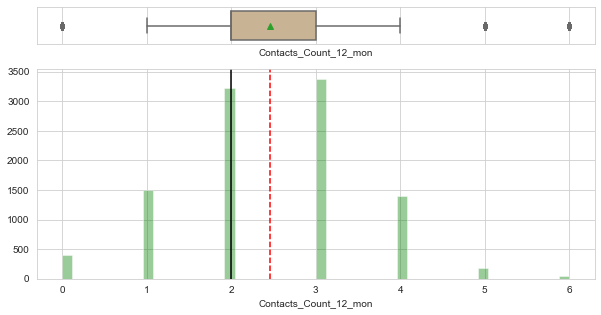

In [25]:
histogram_boxplot(df["Contacts_Count_12_mon"])

In [26]:
miss_vals = df["Contacts_Count_12_mon"].isnull().sum()
print ('*'*100)
print ('There are', df["Contacts_Count_12_mon"].nunique(), 'unique values:')
print (df["Contacts_Count_12_mon"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Contacts_Count_12_mon'].describe().T

****************************************************************************************************
There are 7 unique values:
[3 2 0 1 4 5 6]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean         2.455317
std          1.106225
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Contacts_Count_12_mon, dtype: float64

## Total_Revolving_Bal


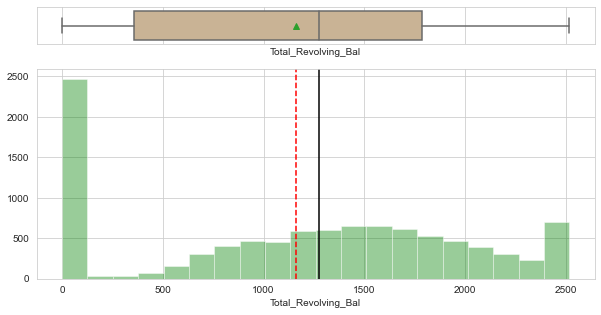

In [27]:
histogram_boxplot(df["Total_Revolving_Bal"])

In [28]:
miss_vals = df["Total_Revolving_Bal"].isnull().sum()
print ('*'*100)
print ('There are', df["Total_Revolving_Bal"].nunique(), 'unique values:')
print (df["Total_Revolving_Bal"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Total_Revolving_Bal'].describe().T

****************************************************************************************************
There are 1974 unique values:
[ 777  864    0 ...  534  476 2241]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64

## Avg_Open_To_Buy

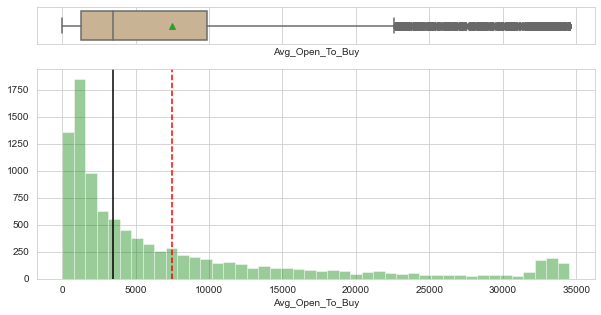

In [29]:
histogram_boxplot(df["Avg_Open_To_Buy"])

In [30]:
miss_vals = df["Avg_Open_To_Buy"].isnull().sum()
print ('*'*100)
print ('There are', df["Avg_Open_To_Buy"].nunique(), 'unique values:')
print (df["Avg_Open_To_Buy"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Avg_Open_To_Buy'].describe().T

****************************************************************************************************
There are 6813 unique values:
[11914.  7392.  3418. ... 11831.  5409.  8427.]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64

## Total_Amt_Chng_Q4_Q1

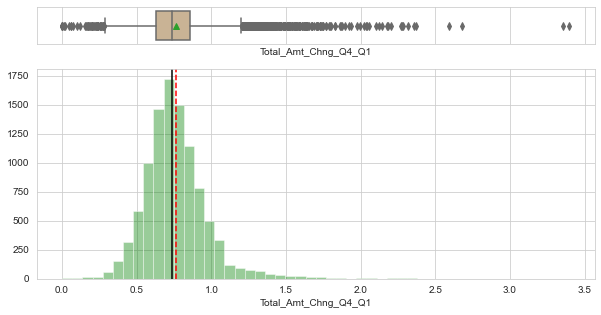

In [31]:
histogram_boxplot(df["Total_Amt_Chng_Q4_Q1"])

In [32]:
miss_vals = df["Total_Amt_Chng_Q4_Q1"].isnull().sum()
print ('*'*100)
print ('There are', df["Total_Amt_Chng_Q4_Q1"].nunique(), 'unique values:')
print (df["Total_Amt_Chng_Q4_Q1"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Total_Amt_Chng_Q4_Q1'].describe().T

****************************************************************************************************
There are 1158 unique values:
[1.335 1.541 2.594 ... 0.222 0.204 0.166]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

## Total_Trans_Amt

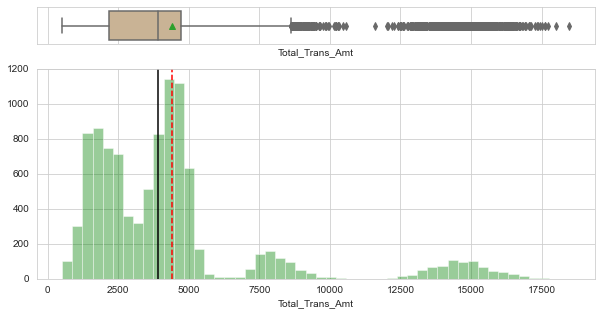

In [33]:
histogram_boxplot(df["Total_Trans_Amt"])

In [34]:
miss_vals = df["Total_Trans_Amt"].isnull().sum()
print ('*'*100)
print ('There are', df["Total_Trans_Amt"].nunique(), 'unique values:')
print (df["Total_Trans_Amt"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Total_Trans_Amt'].describe().T

****************************************************************************************************
There are 5033 unique values:
[ 1144  1291  1887 ... 10291  8395 10294]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64

## Total_Trans_Ct

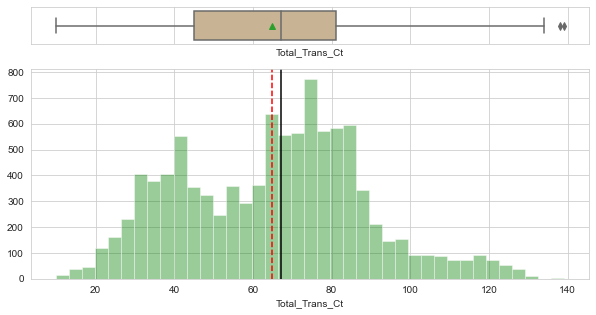

In [35]:
histogram_boxplot(df["Total_Trans_Ct"])

In [36]:
miss_vals = df["Total_Trans_Ct"].isnull().sum()
print ('*'*100)
print ('There are', df["Total_Trans_Ct"].nunique(), 'unique values:')
print (df["Total_Trans_Ct"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Total_Trans_Ct'].describe().T

****************************************************************************************************
There are 126 unique values:
[ 42  33  20  28  24  31  36  32  26  17  29  27  21  30  16  18  23  22
  40  38  25  43  37  19  35  15  41  57  12  14  34  44  13  47  10  39
  53  50  52  48  49  45  11  55  46  54  60  51  63  58  59  61  78  64
  65  62  67  66  56  69  71  75  74  76  84  82  88  68  70  73  86  72
  79  80  85  81  87  83  91  89  77 103  93  96  99  92  90  94  95  98
 100 102  97 101 104 105 106 107 109 118 108 122 113 112 111 127 114 124
 110 120 125 121 117 126 134 116 119 129 131 115 128 139 123 130 138 132]

obvious missing values to be treated 0
****************************************************************************************************


count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

## Total_Ct_Chng_Q4_Q1

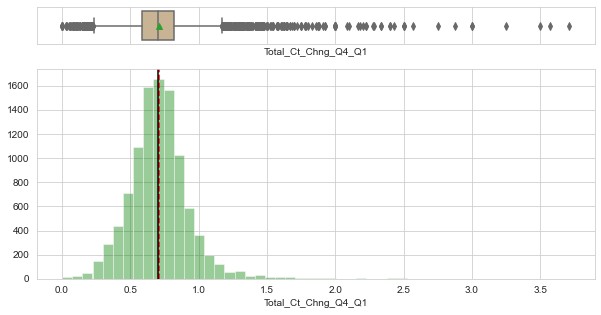

In [37]:
histogram_boxplot(df["Total_Ct_Chng_Q4_Q1"])

In [38]:
miss_vals = df["Total_Ct_Chng_Q4_Q1"].isnull().sum()
print ('*'*100)
print ('There are', df["Total_Ct_Chng_Q4_Q1"].nunique(), 'unique values:')
print (df["Total_Ct_Chng_Q4_Q1"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Total_Ct_Chng_Q4_Q1'].describe().T

****************************************************************************************************
There are 830 unique values:
[1.625 3.714 2.333 2.5   0.846 0.722 0.714 1.182 0.882 0.68  1.364 3.25
 2.    0.611 1.7   0.929 1.143 0.909 0.6   1.571 0.353 0.75  0.833 1.3
 1.    0.9   2.571 1.6   1.667 0.483 1.176 1.2   0.556 0.143 0.474 0.917
 1.333 0.588 0.8   1.923 0.25  0.364 1.417 1.083 1.25  0.5   1.154 0.733
 0.667 2.4   1.05  0.286 0.4   0.522 0.435 1.875 0.966 1.412 0.526 0.818
 1.8   1.636 2.182 0.619 0.933 1.222 0.304 0.727 0.385 1.5   0.789 0.542
 1.1   1.095 0.824 0.391 0.346 3.    1.056 1.118 0.786 0.625 1.533 0.382
 0.355 0.765 0.778 2.2   1.545 0.7   1.211 1.231 0.636 0.455 2.875 1.308
 0.467 1.909 0.571 0.812 2.429 0.706 2.167 0.263 0.429 2.286 0.828 1.467
 0.478 0.867 0.88  1.444 1.273 0.941 0.684 0.591 0.762 0.529 0.615 0.519
 0.421 0.947 1.167 1.105 0.737 1.263 0.538 1.071 0.357 0.407 0.923 1.455
 0.35  2.273 0.69  0.65  0.167 0.647 1.615 0.545 0.875 1.125 0.462 1.2

count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

## Avg_Utilization_Ratio

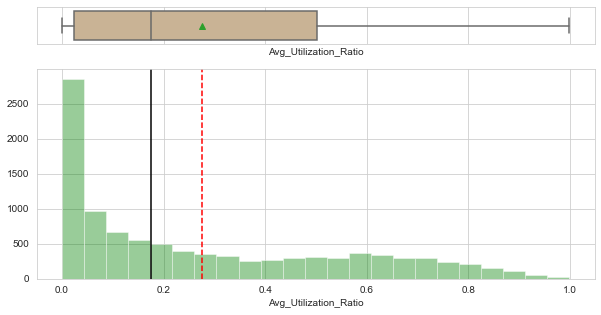

In [39]:
histogram_boxplot(df["Avg_Utilization_Ratio"])

In [40]:
miss_vals = df["Avg_Utilization_Ratio"].isnull().sum()
print ('*'*100)
print ('There are', df["Avg_Utilization_Ratio"].nunique(), 'unique values:')
print (df["Avg_Utilization_Ratio"].unique())
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Avg_Utilization_Ratio'].describe().T

****************************************************************************************************
There are 964 unique values:
[0.061 0.105 0.    0.76  0.311 0.066 0.048 0.113 0.144 0.217 0.174 0.195
 0.279 0.23  0.078 0.095 0.788 0.08  0.086 0.152 0.626 0.215 0.093 0.099
 0.285 0.658 0.69  0.282 0.562 0.135 0.544 0.757 0.241 0.077 0.018 0.355
 0.145 0.209 0.793 0.074 0.259 0.591 0.687 0.127 0.667 0.843 0.422 0.156
 0.525 0.587 0.211 0.088 0.111 0.044 0.276 0.704 0.656 0.053 0.051 0.467
 0.698 0.067 0.079 0.287 0.36  0.256 0.719 0.198 0.14  0.035 0.619 0.108
 0.062 0.765 0.963 0.524 0.347 0.45  0.232 0.299 0.085 0.059 0.43  0.62
 0.027 0.169 0.058 0.223 0.057 0.513 0.473 0.047 0.106 0.05  0.03  0.615
 0.15  0.407 0.191 0.096 0.176 0.83  0.412 0.678 0.246 0.271 0.114 0.395
 0.406 0.258 0.178 0.941 0.141 0.118 0.119 0.64  0.432 0.612 0.359 0.309
 0.101 0.607 0.512 0.806 0.463 0.77  0.076 0.133 0.037 0.146 0.171 0.069
 0.837 0.055 0.294 0.39  0.19  0.692 0.503 0.251 0.11  0.087 0.214 0

count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64

# Categorical variables review

  
* Attrition_Flag
* Gender
* Education_Level
* Marital_Status
* Income_Category
* Card_Category



## Attrition Flag ( PREDICTOR VARIABLE)

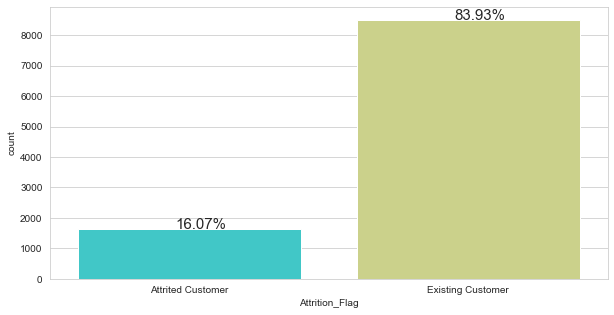

In [41]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Attrition_Flag'], palette = 'rainbow')
bar_perc (ax,df['Attrition_Flag'])

In [42]:
col_count = len(df['Attrition_Flag'])
perc_col_unique = ((df['Attrition_Flag'].value_counts())/col_count)*100
miss_vals = df['Attrition_Flag'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Attrition_Flag'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


Percentage category split (%):
Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


### Encoding current categorical values as follows:

Attrited Customer = 1

Existing Customer = 0




In [43]:
df['Attrition_Flag']=df['Attrition_Flag'].replace(to_replace=['Attrited Customer', 'Existing Customer'], value=[1, 0])

## Education_Level

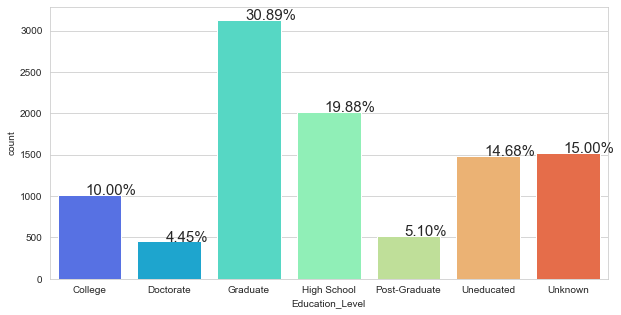

In [44]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Education_Level'], palette = 'rainbow')
bar_perc (ax,df['Education_Level'])

In [45]:
col_count = len(df['Education_Level'])
perc_col_unique = ((df['Education_Level'].value_counts())/col_count)*100
miss_vals = df['Education_Level'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Education_Level'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


Percentage category split (%):
Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


## Gender

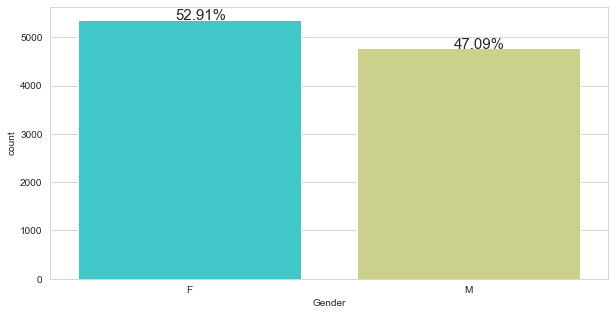

In [46]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Gender'], palette = 'rainbow')
bar_perc (ax,df['Gender'])

In [47]:
col_count = len(df['Gender'])
perc_col_unique = ((df['Gender'].value_counts())/col_count)*100
miss_vals = df['Gender'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Gender'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
F    5358
M    4769
Name: Gender, dtype: int64


Percentage category split (%):
F    52.908068
M    47.091932
Name: Gender, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


## Marital_Status

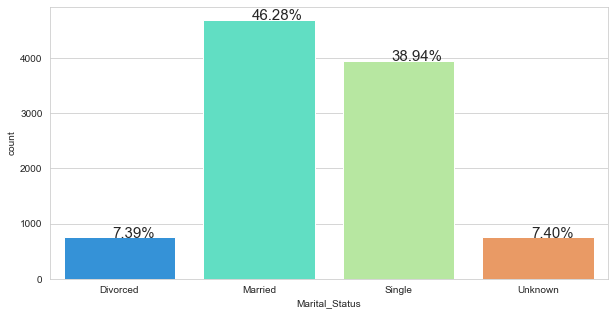

In [48]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Marital_Status'], palette = 'rainbow')
bar_perc (ax,df['Marital_Status'])

In [49]:
col_count = len(df['Marital_Status'])
perc_col_unique = ((df['Marital_Status'].value_counts())/col_count)*100
miss_vals = df['Marital_Status'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Marital_Status'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


Percentage category split (%):
Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


## Income_Category

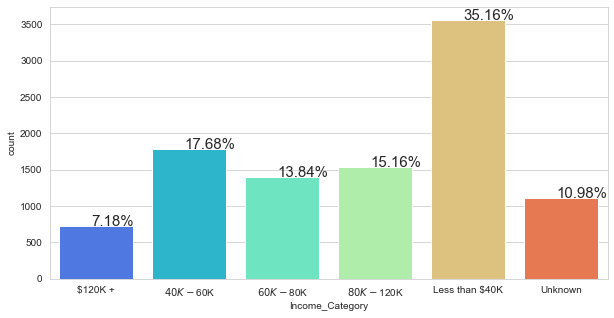

In [50]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Income_Category'], palette = 'rainbow')
bar_perc (ax,df['Income_Category'])

In [51]:
col_count = len(df['Income_Category'])
perc_col_unique = ((df['Income_Category'].value_counts())/col_count)*100
miss_vals = df['Income_Category'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Income_Category'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


Percentage category split (%):
Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


## Card_Category



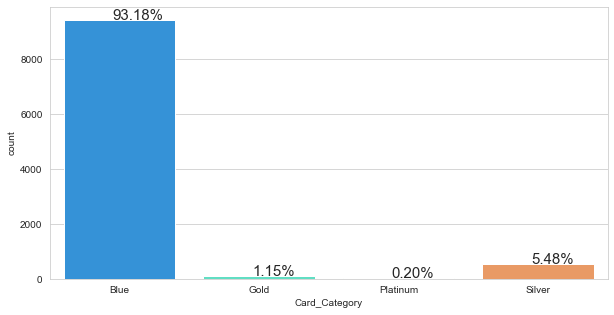

In [52]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Card_Category'], palette = 'rainbow')
bar_perc (ax,df['Card_Category'])

In [53]:
col_count = len(df['Card_Category'])
perc_col_unique = ((df['Card_Category'].value_counts())/col_count)*100
miss_vals = df['Card_Category'].isnull().sum()

print('*'*100)
print('Unique values and % in this category are : ')
print(df['Card_Category'].value_counts())
print ('')
print ('')
print("Percentage category split (%):")
print(perc_col_unique)
print('*'*100)
print ('obvious missing values to be treated:', miss_vals)
print ('Percentage missing values:', (miss_vals/col_count)*100)

****************************************************************************************************
Unique values and % in this category are : 
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


Percentage category split (%):
Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64
****************************************************************************************************
obvious missing values to be treated: 0
Percentage missing values: 0.0


## Bi-Variate and Multi-Variate Analysis : exploring relationships of variables with ProdTaken

##  Bi-variate Analysis


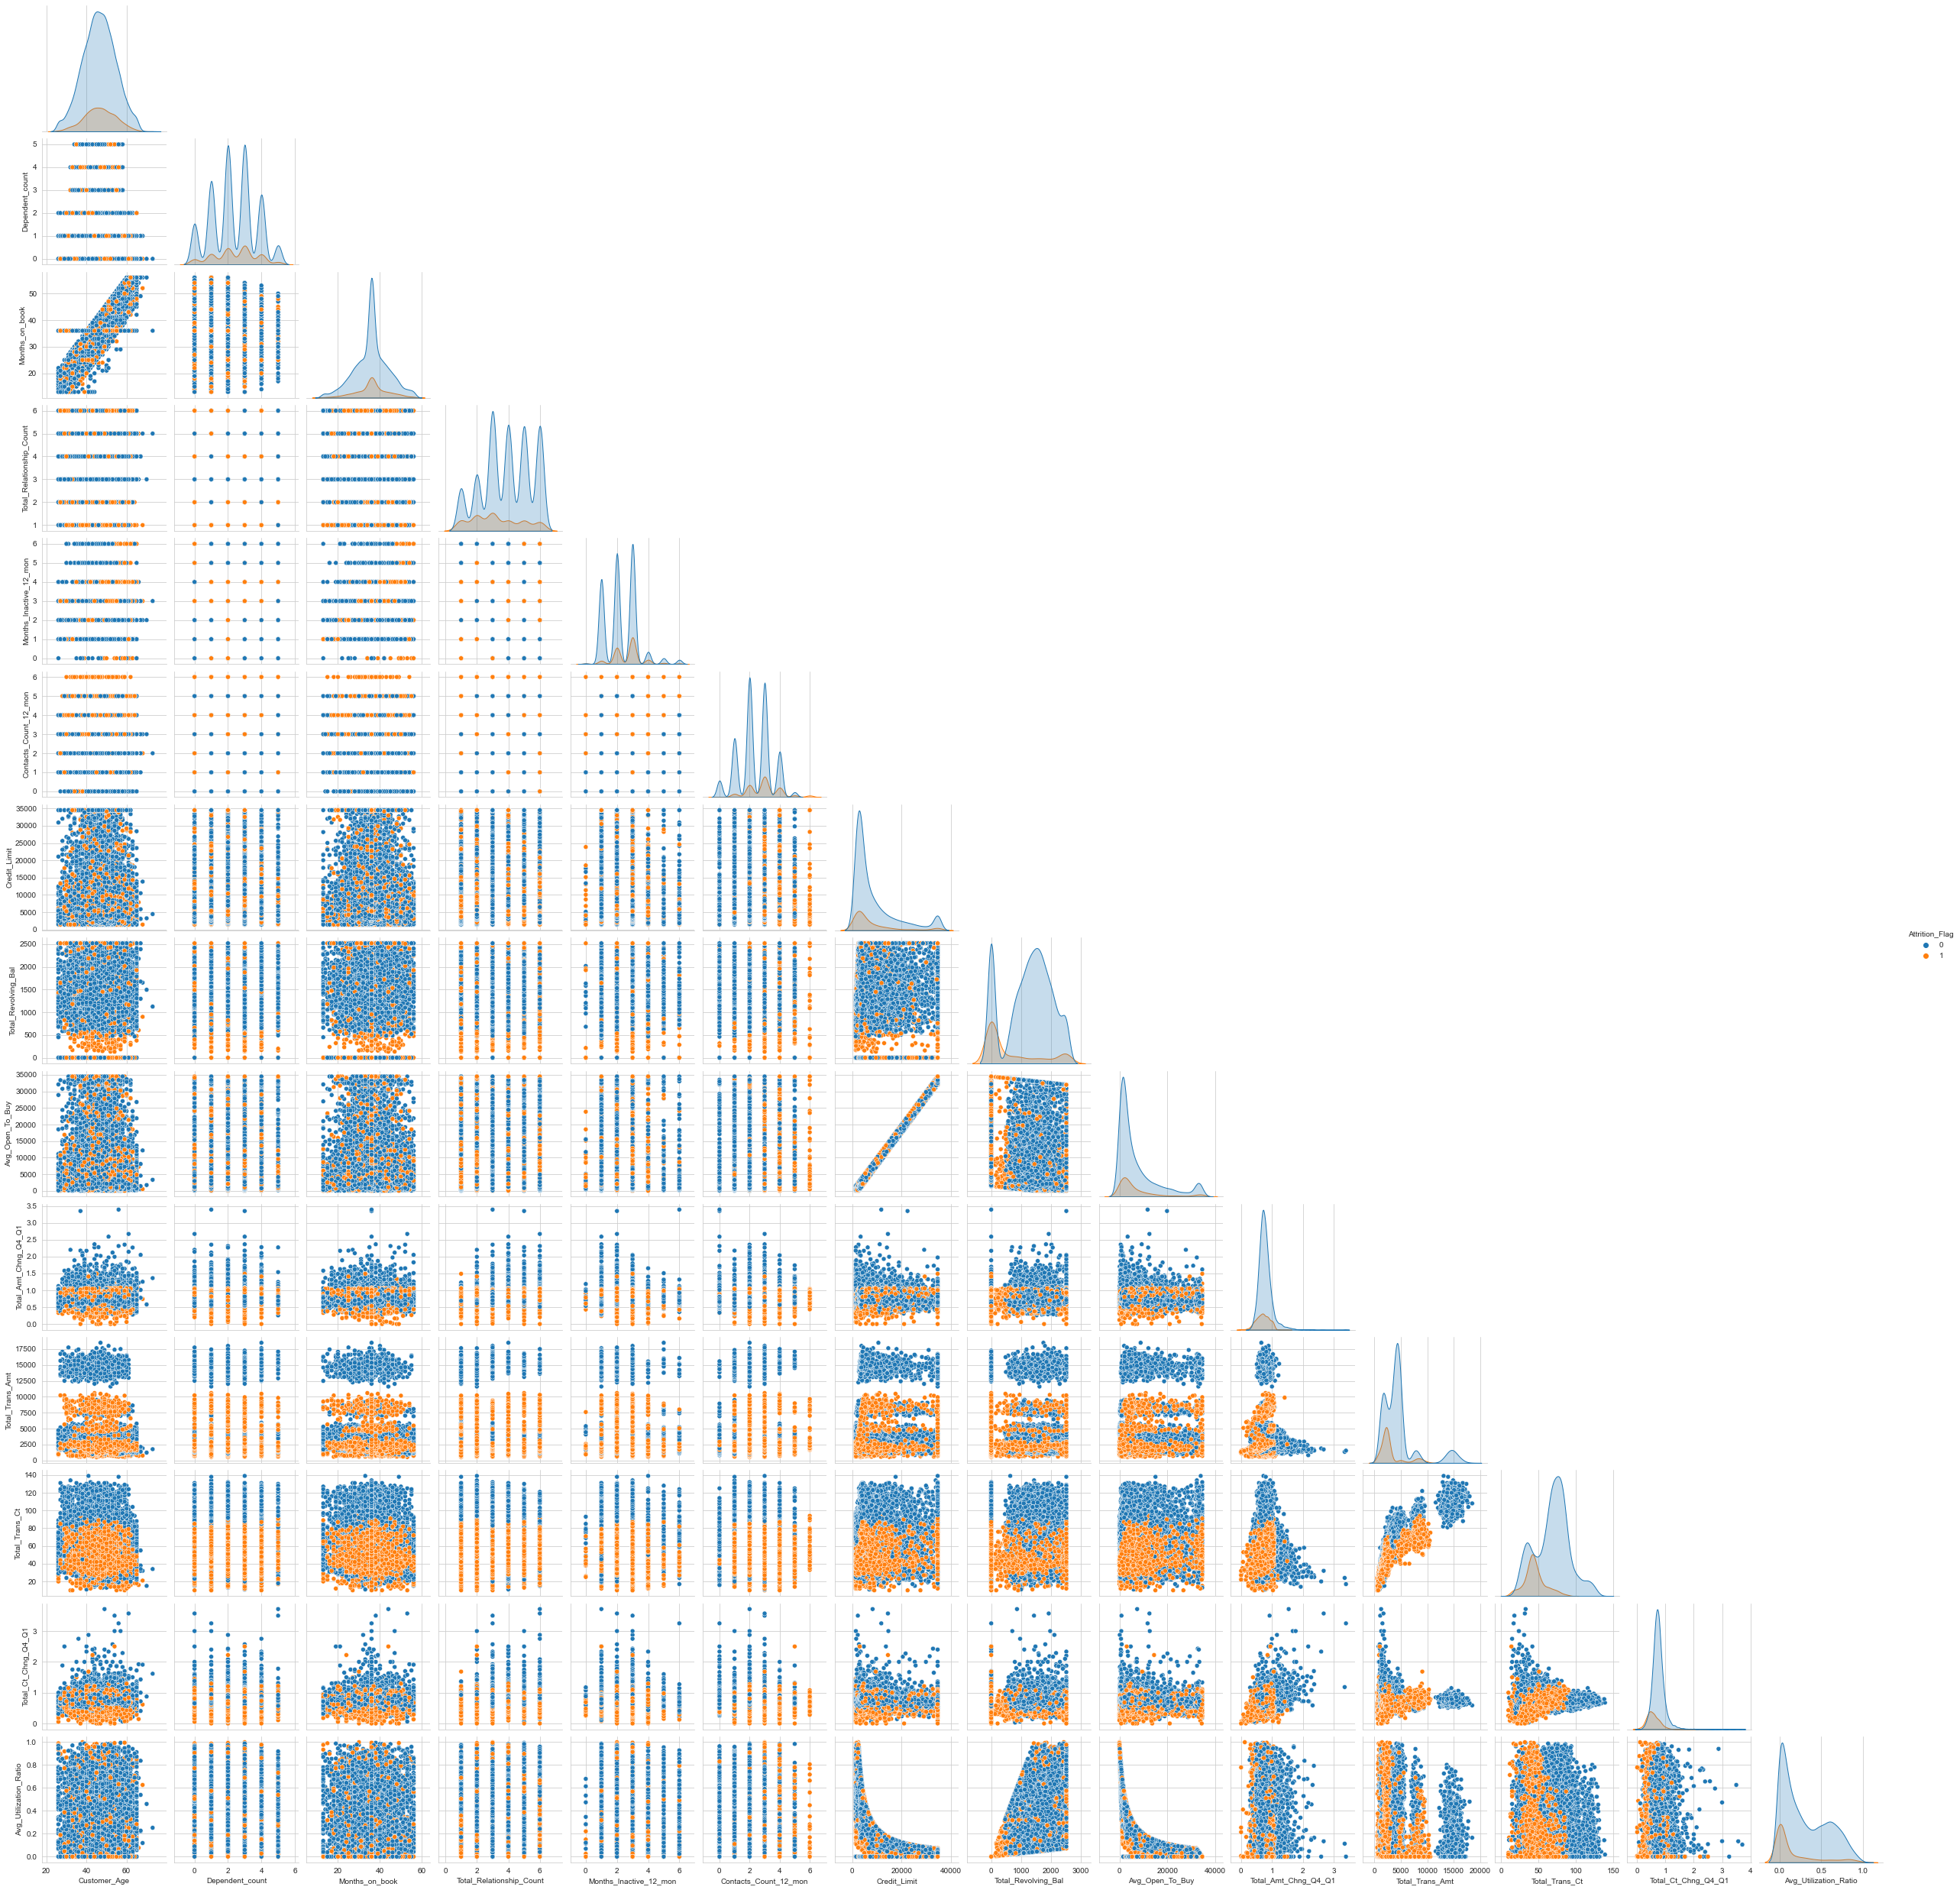

In [54]:
sns.pairplot(df, hue="Attrition_Flag", corner = True );

## Correlation Matrix

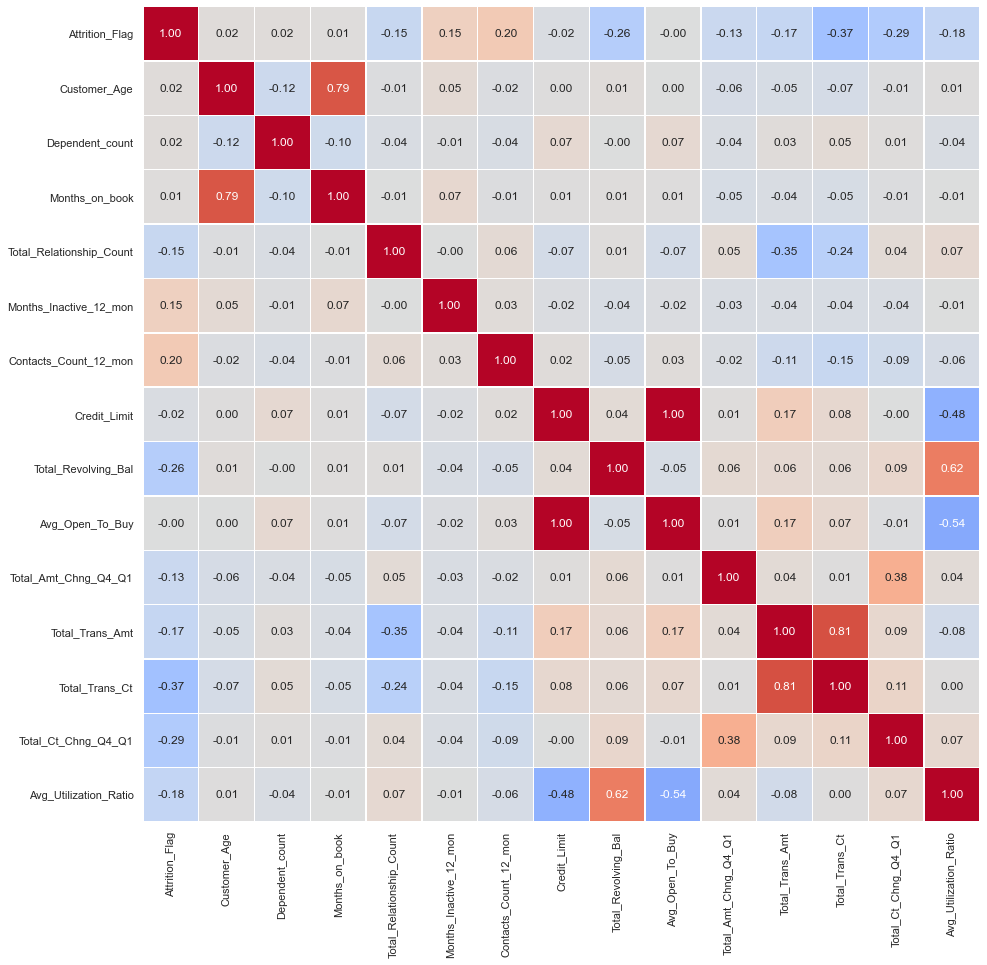

In [55]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="coolwarm",
    fmt="0.2f",
)
plt.show()

Variables with some potential correlation to be explored further:

1. Customer age and the time with the company (Months_on_book) has a correlation faction of 0.79, indicating some strong correlation.

2. Total_Trans_Amt and Total_Trans_Ct are positively correlated at 0.81.

3.  The customers revolving banlance and utilization rate is also positively correlated as expected, although not strongly at 0.62.



## Function to Visualize Stacked Bar Plots

In [56]:
# looking at variable relationships to our Predictor Variable, ProdTaken
def stacked_plot(x):
    sns.set (palette = 'icefire')
    tab1 = pd.crosstab (x,df['Attrition_Flag'], margins = True)
    print (tab1)
    print ('-' * 120)
    tab = pd.crosstab (x,df['Attrition_Flag'], normalize = 'index')
    tab.plot (kind = 'bar', stacked = True, figsize = (10,5))
    plt.show()

### Gender

Attrition_Flag     0     1    All
Gender                           
F               4428   930   5358
M               4072   697   4769
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


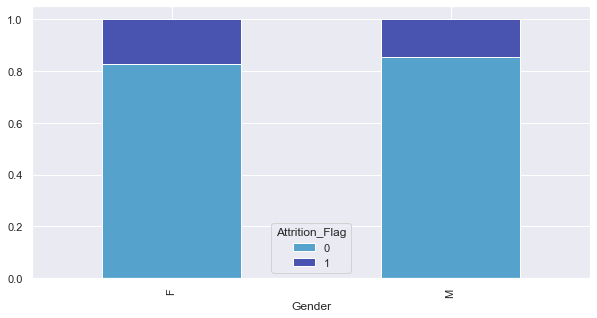

In [57]:
stacked_plot(df['Gender'])

### Education Level

Attrition_Flag      0     1    All
Education_Level                   
College           859   154   1013
Doctorate         356    95    451
Graduate         2641   487   3128
High School      1707   306   2013
Post-Graduate     424    92    516
Uneducated       1250   237   1487
Unknown          1263   256   1519
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


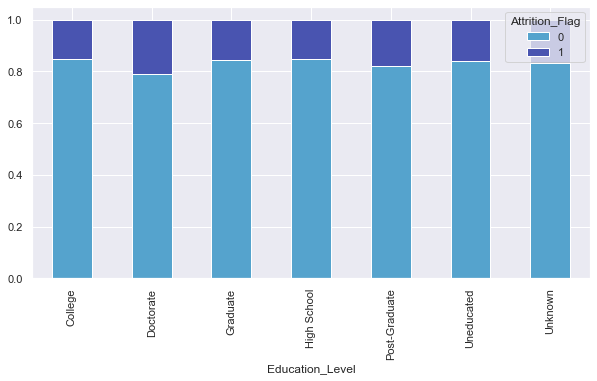

In [58]:
stacked_plot(df['Education_Level'])

### Marital Status

Attrition_Flag     0     1    All
Marital_Status                   
Divorced         627   121    748
Married         3978   709   4687
Single          3275   668   3943
Unknown          620   129    749
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


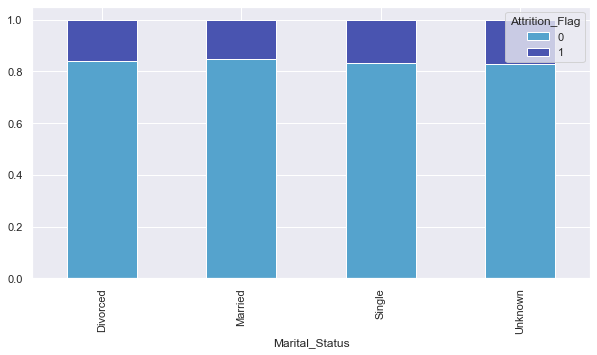

In [59]:
stacked_plot(df['Marital_Status'])

### Income Category

Attrition_Flag      0     1    All
Income_Category                   
$120K +           601   126    727
$40K - $60K      1519   271   1790
$60K - $80K      1213   189   1402
$80K - $120K     1293   242   1535
Less than $40K   2949   612   3561
Unknown           925   187   1112
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


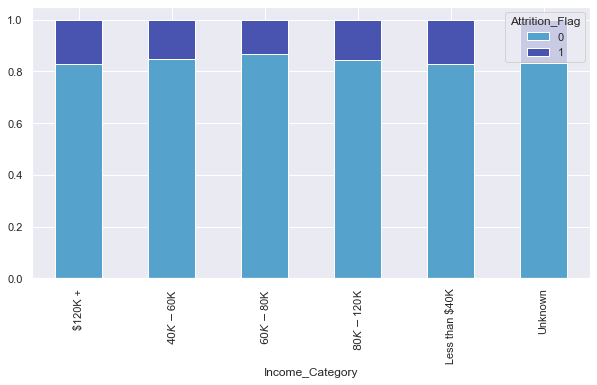

In [60]:
stacked_plot(df['Income_Category'])

### Card Category

Attrition_Flag     0     1    All
Card_Category                    
Blue            7917  1519   9436
Gold              95    21    116
Platinum          15     5     20
Silver           473    82    555
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


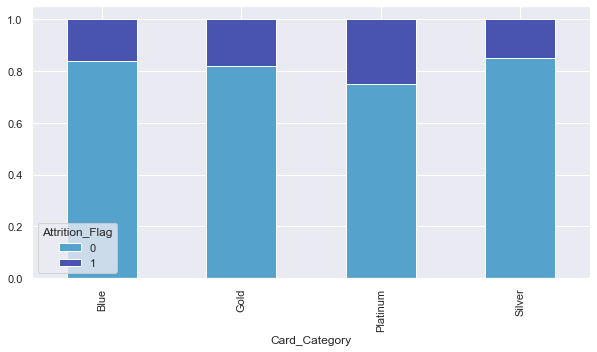

In [61]:
stacked_plot(df['Card_Category'])

### Customer Age

Attrition_Flag     0     1    All
Customer_Age                     
26                72     6     78
27                29     3     32
28                28     1     29
29                49     7     56
30                55    15     70
31                78    13     91
32                89    17    106
33               107    20    127
34               127    19    146
35               163    21    184
36               197    24    221
37               223    37    260
38               256    47    303
39               285    48    333
40               297    64    361
41               303    76    379
42               364    62    426
43               388    85    473
44               416    84    500
45               407    79    486
46               408    82    490
47               403    76    479
48               387    85    472
49               416    79    495
50               381    71    452
51               340    58    398
52               318    58    376
53            

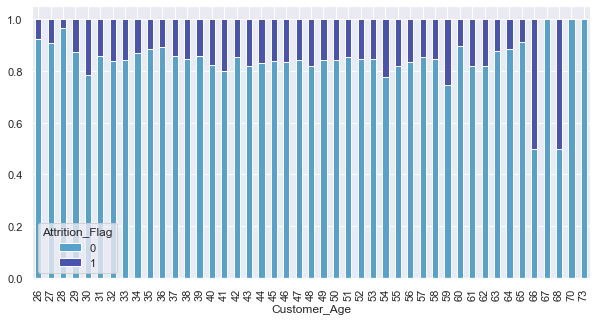

In [62]:
stacked_plot(df['Customer_Age'])

### Dependent Count

Attrition_Flag      0     1    All
Dependent_count                   
0                 769   135    904
1                1569   269   1838
2                2238   417   2655
3                2250   482   2732
4                1314   260   1574
5                 360    64    424
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


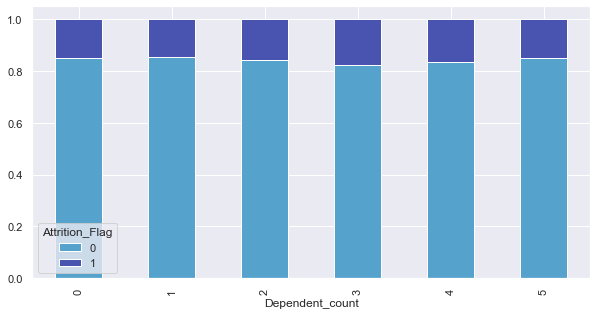

In [63]:
stacked_plot(df['Dependent_count'])

### Months_on_book

Attrition_Flag     0     1    All
Months_on_book                   
13                63     7     70
14                15     1     16
15                25     9     34
16                26     3     29
17                35     4     39
18                45    13     58
19                57     6     63
20                61    13     74
21                73    10     83
22                85    20    105
23               104    12    116
24               132    28    160
25               134    31    165
26               162    24    186
27               183    23    206
28               232    43    275
29               207    34    241
30               242    58    300
31               284    34    318
32               245    44    289
33               257    48    305
34               296    57    353
35               272    45    317
36              2033   430   2463
37               296    62    358
38               290    57    347
39               277    64    341
40            

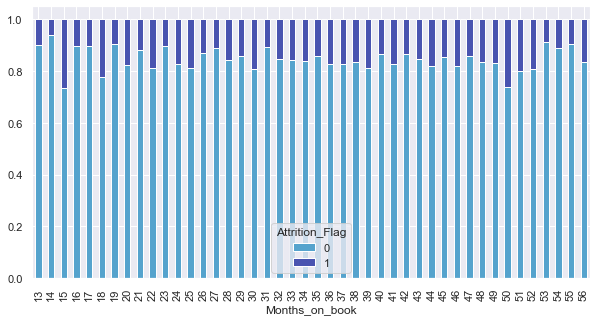

In [64]:
stacked_plot(df['Months_on_book'])

### Total Relationship Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
1                          677   233    910
2                          897   346   1243
3                         1905   400   2305
4                         1687   225   1912
5                         1664   227   1891
6                         1670   196   1866
All                       8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


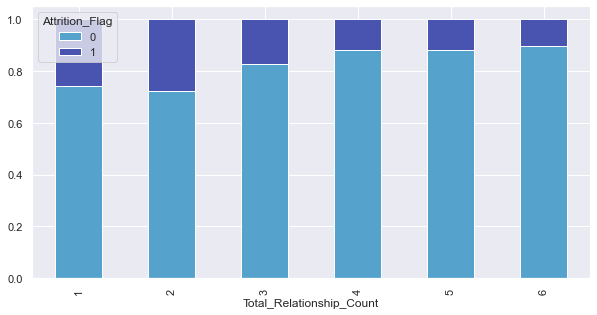

In [65]:
stacked_plot(df['Total_Relationship_Count'])

### Months Inactive 12 Months

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
0                         14    15     29
1                       2133   100   2233
2                       2777   505   3282
3                       3020   826   3846
4                        305   130    435
5                        146    32    178
6                        105    19    124
All                     8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


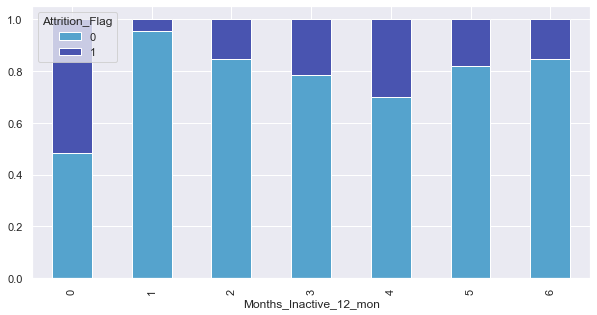

In [66]:
stacked_plot(df['Months_Inactive_12_mon'])

### Contact Counts in Last 12 months


Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
0                       392     7    399
1                      1391   108   1499
2                      2824   403   3227
3                      2699   681   3380
4                      1077   315   1392
5                       117    59    176
6                         0    54     54
All                    8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


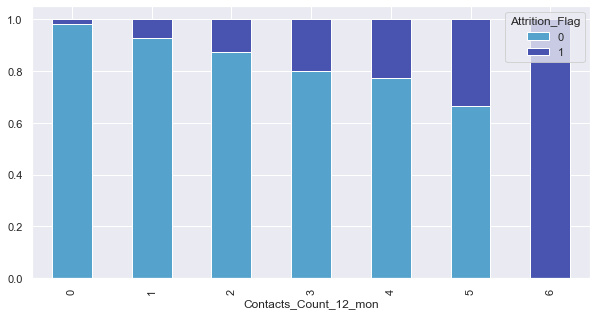

In [67]:
stacked_plot(df['Contacts_Count_12_mon'])

In [68]:
### Function to plot distributions and Boxplots of customers who attrited
def plot(x,target='Attrition_Flag'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of customers who Attrited')
    sns.distplot(df[(df[target] == 1)][x],ax=axs[0,0],color='red')
    axs[0, 1].set_title("Distribution of customers who Stayed")
    sns.distplot(df[(df[target] == 0)][x],ax=axs[0,1],color='blue')
    axs[1,0].set_title('Boxplot : Attrition ')
    sns.boxplot(df[target],df[x],ax=axs[1,0],palette='Reds')
    axs[1,1].set_title('Boxplot : Attrition - Without outliers')
    sns.boxplot(df[target],df[x],ax=axs[1,1],showfliers=False,palette='Blues')
    plt.tight_layout()
    plt.show()

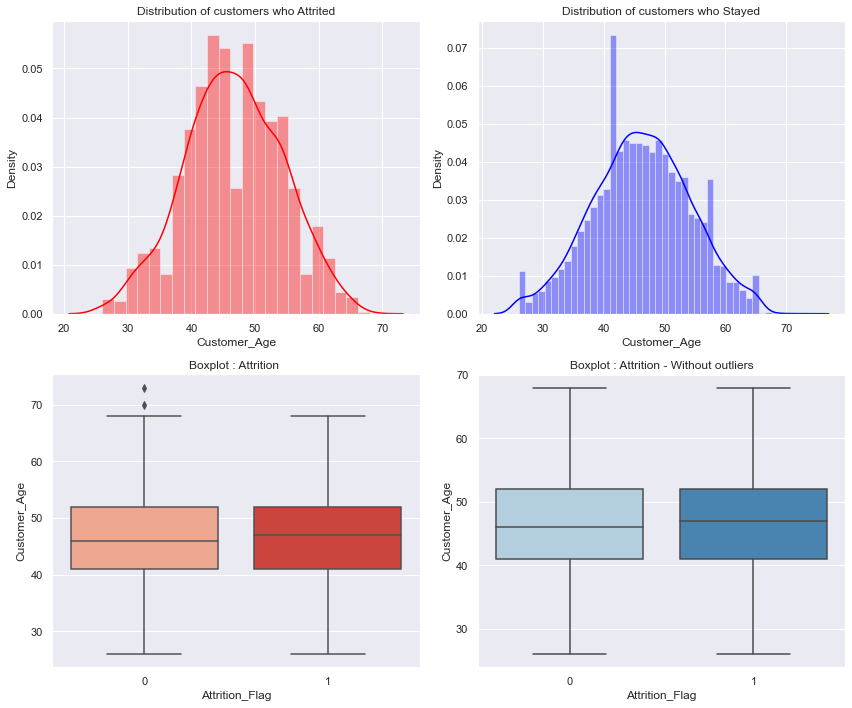

In [69]:
plot('Customer_Age')

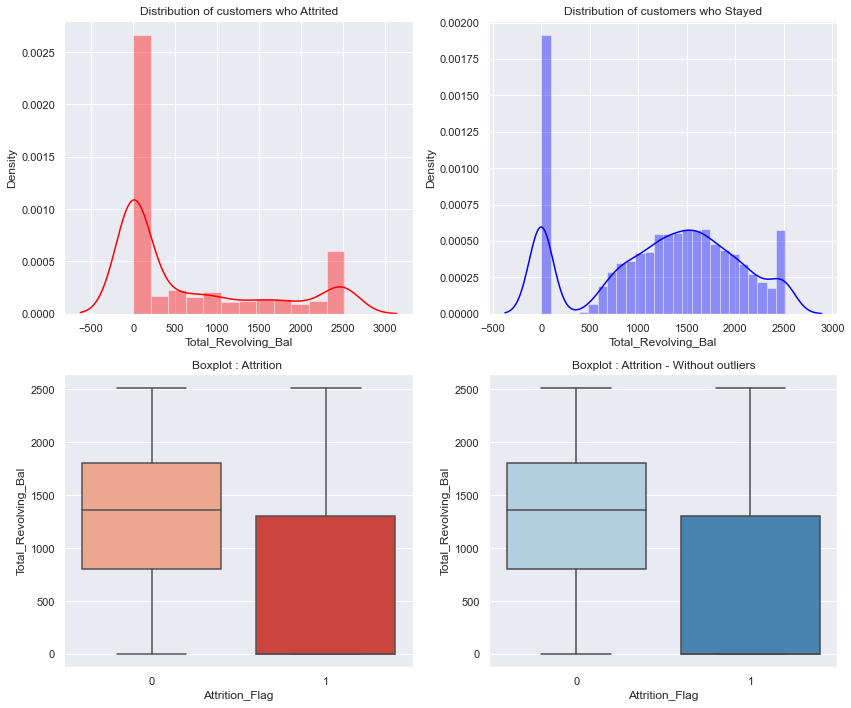

In [70]:
plot ('Total_Revolving_Bal')

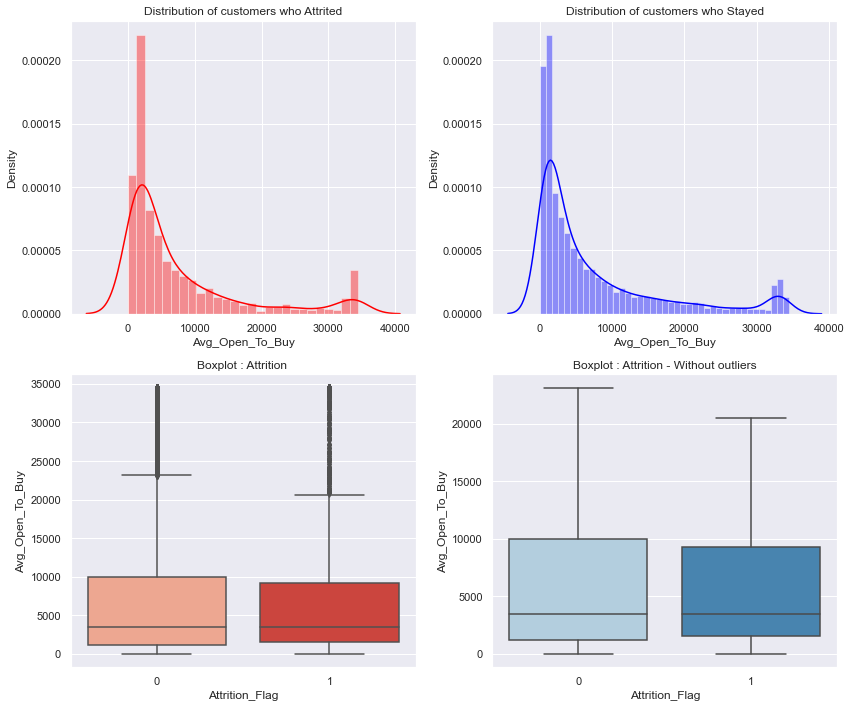

In [71]:
plot('Avg_Open_To_Buy')

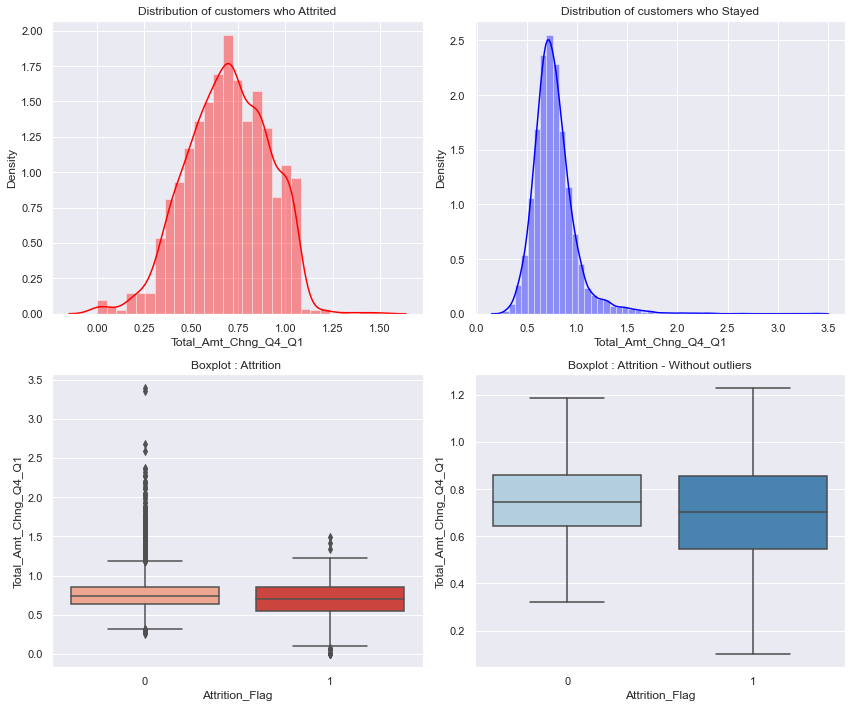

In [72]:
plot('Total_Amt_Chng_Q4_Q1')

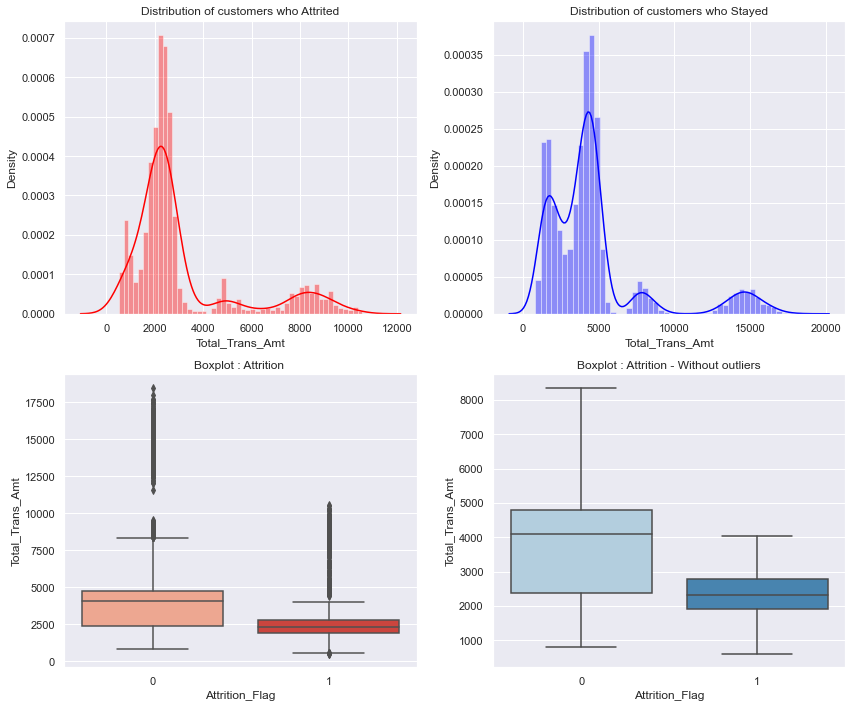

In [73]:
plot('Total_Trans_Amt')

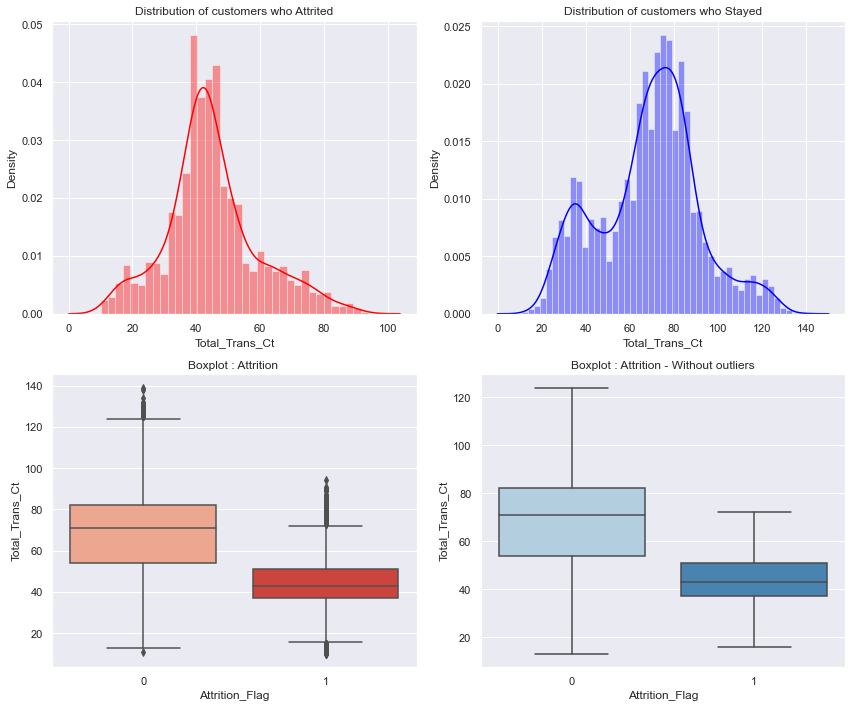

In [74]:
plot('Total_Trans_Ct')

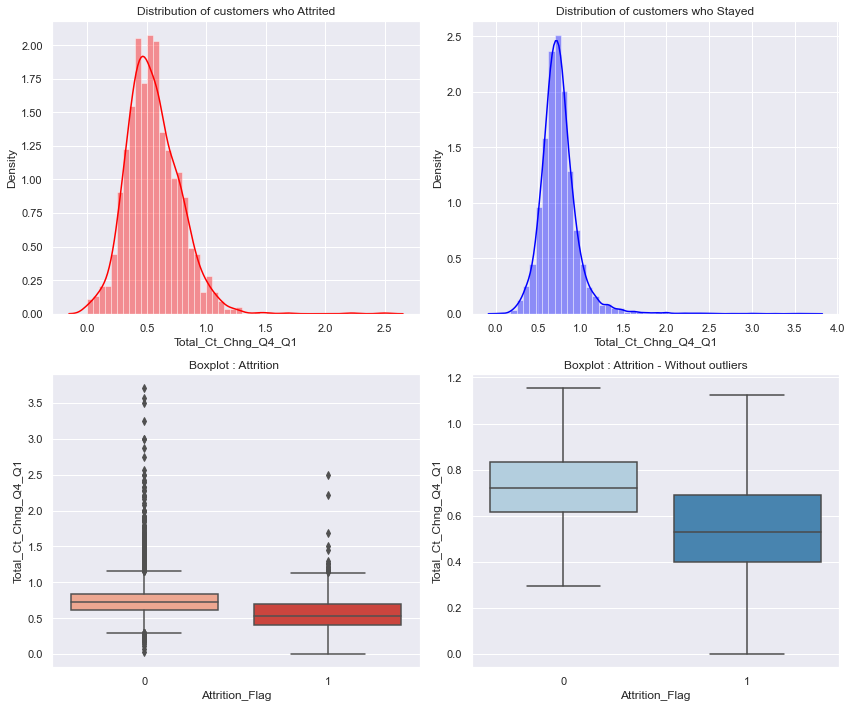

In [75]:
plot('Total_Ct_Chng_Q4_Q1')

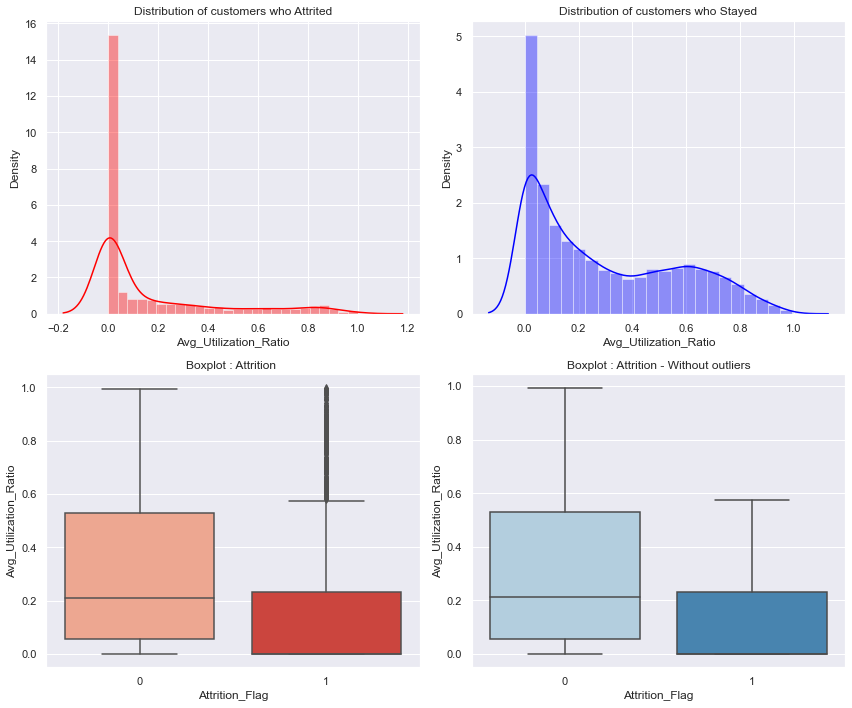

In [76]:
plot('Avg_Utilization_Ratio')

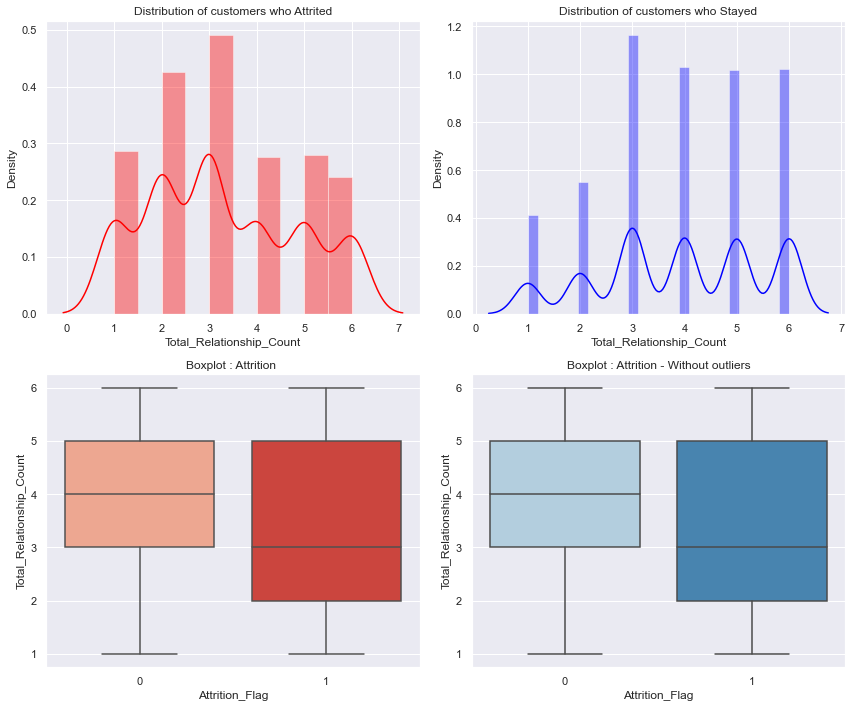

In [135]:
plot('Total_Relationship_Count')

## Multi-variate Analysis

In [77]:
# step through numerical data, pivoting on Attrition_Flag
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

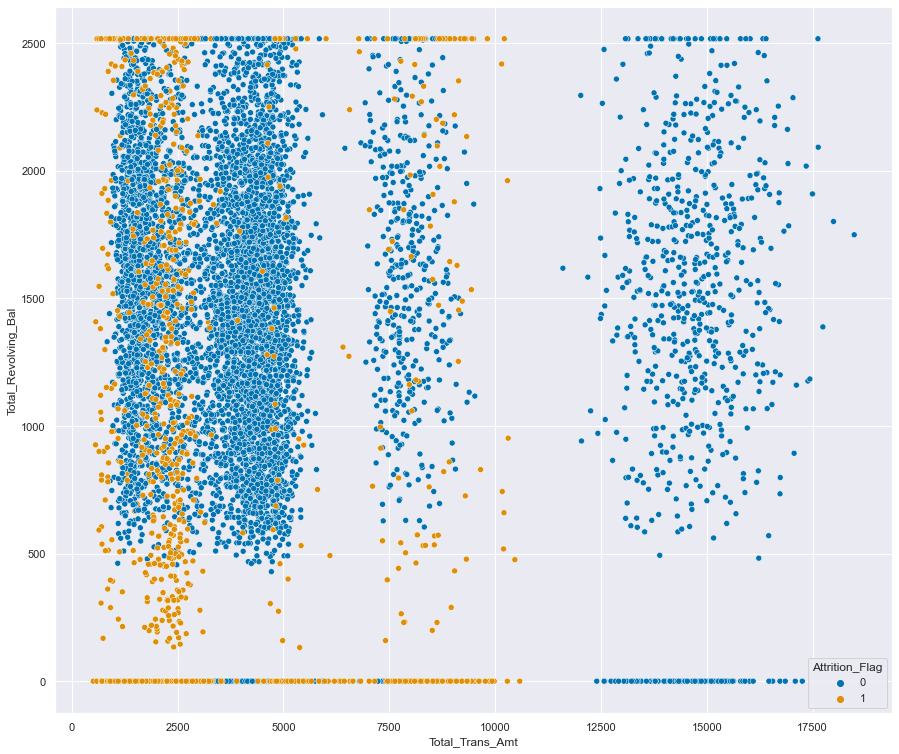

In [130]:
plt.figure(figsize=(15,13))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Revolving_Bal', hue='Attrition_Flag', data=df, palette ='colorblind');

### Observations


When comparing a Customers Total Revolving Balance vs their Spending (Total_Trans_Amt) in the last 12 months we see that there are customers that carry no revolving balance, spend up to USD 10,000 pa and then leave. Why?

There are also customers who spend much higher per annum (USD 17,500) and stay with the company.  These are  good customers in their spending and retention. The company makes more money per transaction for these customers, but low interest payments.  Conversely, there are other customers who spend large, carry large balances, and stay.  These customers are risky potentially for default but are the highest revenue producers for the Company.  We want to understand these customers more.

There is also a distinct band for customers that spend about USD 2,500 pa, carry a wide range of revolving balance, and eventually leave?  Why?  Is this voluntary attrition or are their accounts closed due to poor payment performance?

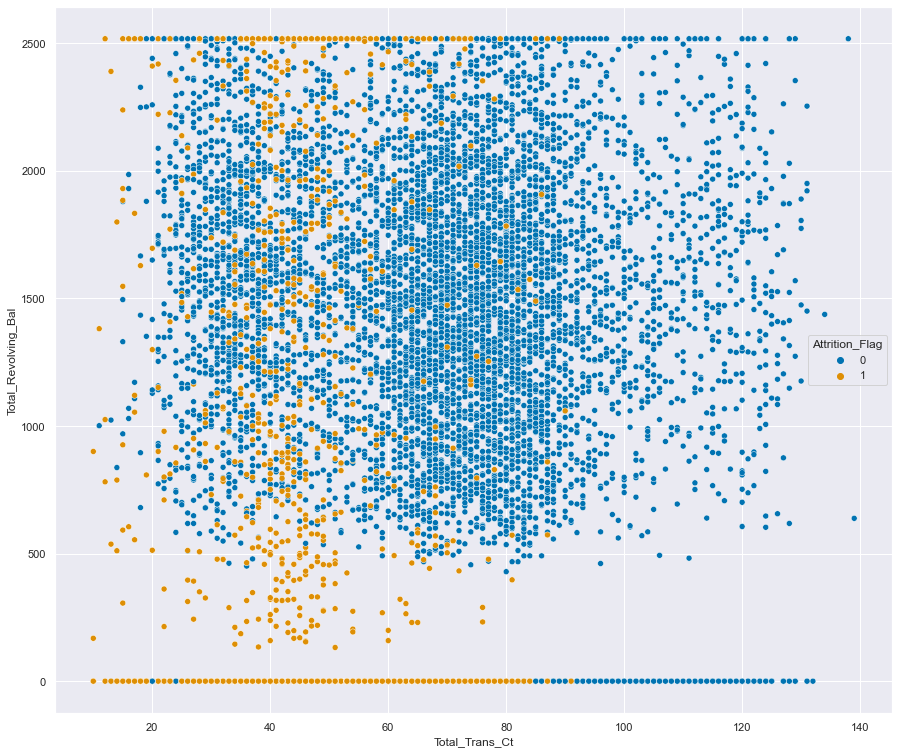

In [131]:
plt.figure(figsize=(15,13))
sns.scatterplot(x='Total_Trans_Ct', y='Total_Revolving_Bal', hue='Attrition_Flag', data=df, palette ='colorblind');

### Observations

Transaction counts tell a very similar story to transacted amounts as expected.

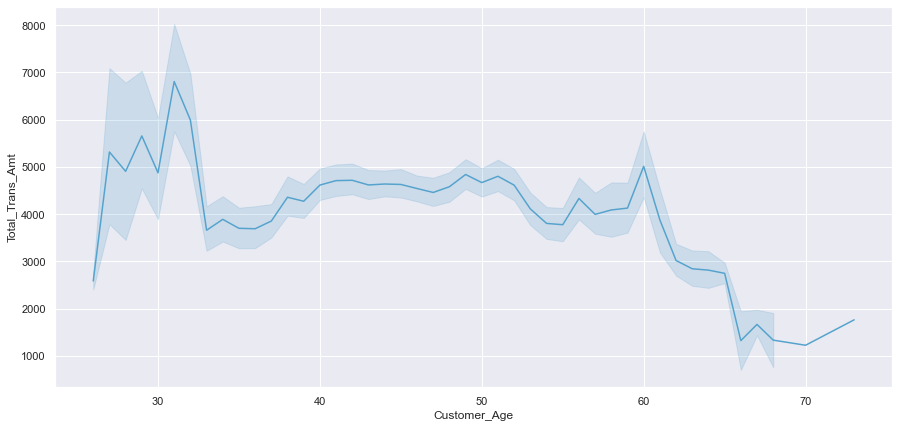

In [132]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Customer_Age', y='Total_Trans_Amt', data=df, palette ='colorblind');

ERROR! Session/line number was not unique in database. History logging moved to new session 362


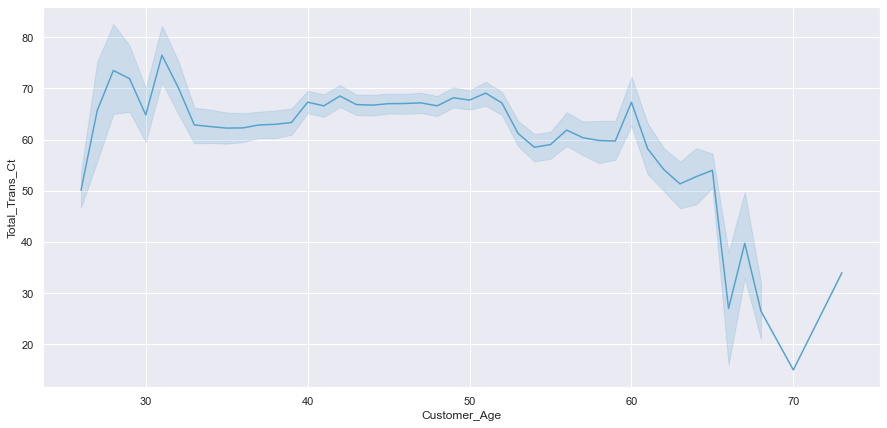

In [133]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Customer_Age', y='Total_Trans_Ct', data=df, palette ='colorblind');

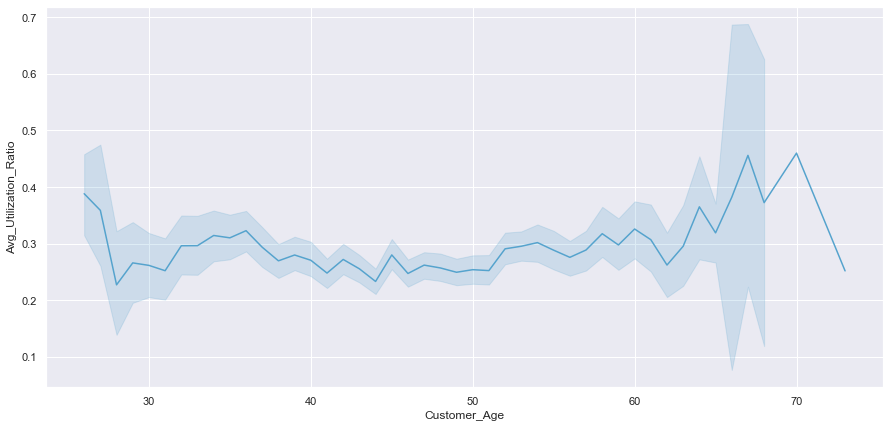

In [134]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Customer_Age', y='Avg_Utilization_Ratio', data=df, palette ='colorblind');

# <a id = "link2"></a> 2. Insights based on EDA







The average customer is 46 years old and ranges from 26 to 73 with half of the customer being between 41 to 52 years old. The data is slightly right skewed with few outliers.

Customers have an average of 2.3 dependents and range from none to 5, with half of all customers having between 1 and 3 dependents, right skewed and no outliers.

Customers have been with the bank a little over 1 year (~13 months) and almost 5 years (56 months).  Customers average 35.92 months with half of all customers having an account open between 31 and 40 months.  The data is not skewed and there a lhs and rsh outliers.

Customers typically engage with almost 4 different products when we they do business with the bank.  They engage on at least 1 product and max out at 6 products.  Half of all customers hold between 3 to 5 products.  The data is left skewed with no outliers.

Customers range from being 100 percent active (0 inactivity) to being inactive in the last 12 months.  On average a customer will be inactive for 2.3 months out of the last 12.  The maximum inactivity is 6 months, or 50 percent of the time.  50 percent of all customers will take 2 to 3 months off in the last 12 months.

Some customers go 12 months without any contact.  The most contact a customer will have in 12 months is 6 times, but 50 percent of all customers will have between 2-3 contacts with the company every 12 months, with an average of 2.45 times.  The data is right skewed and there are outliers.

25 percent of customers do not carry a balance.  The average customer carrier USD 1,162 in debt.  The max debt is USD 2,517 and half of all customers will carry between USD 359 and USD 1784. The data is left skewed.  No outliers.

Customers have on average USD 7,469 of open credit line.  Some run their cards to the max and average USD 3 at a minimum open line of credit and the maximum average is  USD 34,516.  50 percent of customers keep an average open line of USD 1,324 and USD 9,859.  The average open line of credit is strongly skewed to the right.

From Q4 to Q1, the average customer transacts 25 percent less (or 75 percent of their Q4 amount).  Some customers have no change.  Some transact 339 percent more in Q4 over Q1.  50 percent of the customers spend between 63 percent or 85 percent of what they spent in Q4. This is consistent with there being large spending holidays in Q4.

Spending in the last 12 months for customers is at least USD 510.  The largest spend in the last 12 months is  USD 18,484.  The average customer spends  USD 4,404 with half of all customers spending between  USD 2,155 and  USD 4,741.  The data is right skewed with a significant number of outliers.

Customers will make on average ~65 transactions in  a 12 month period with a minimum of 10 and a maximum of 139.  While large, this seems to indicate that customers may not necessarily use their credit card for everyday expenses.  Half the customers have between 45 and 75 transactions.

Transactions fluctuate throughout the year.  From Q4 to Q1, they go down.  Q1 is on average 71 percent of Q4 transactions.  Some customers don’t use their card from Q4 to Q1, transact 337 percent less than Q4 with half of all customers dropping their transactions by 58 percent to 81 percent.

The average card utilization ratio (or percentage of consumed credit to total open line) on average is 27 percent.  Some customers don’t consume any of their open line.  Some customers consume effectively all of their line, or “max out” their cards.  50 percent of all customers use between 2 and 50 percent  of their open line on average.


16 percent of the customers close their account.  31 percent of customers hold a Graduate degree.  20 percent are High School Graduates, and 10 percent have a College Degree, and another 10 percent have a Doctorate or Post-Graduate degree.  15 percent of the customers have not revealed their education status.  The balance do not have a formal education.

Customers are 53% Male, 46% are married, 7% are divorced.  
35% of all customers make less than $40K pa, 20 percent between  USD 40K to  USD 80K, 15 percent between USD 80K to USD 100K, and 7 percent over  USD 120K.  

93 percent of all customers carry a Blue card, 5.5 percent a Silver cards.  Gold and Platinum cards are negligible.

The correlation of these variables with respect to whether customer will close their account or leave it open are as follows:

* There is no meaningful influence from Gender or Marital Status.

* Education_Level, Income_Category not appear to have a strong influence.

* Customers with only 1-2 products tend to close more often, suggesting that those with more products tend to lean in with card company and remain customers.

* Those customers who have no inactive time in the last 12 months have the highest rate of attrition.  Is this because they carry higher debt loads?  Or do they not like the transactional experience and notice it more given their higher usage frequency?

* Those who have been contacted 6 times in the last 12 months close their accounts 100 percent of the time?  Are these aggravated customers or customers that are delinquent and close their accounts involuntarily?


#   <a id = "link3"></a> 3.  Data Pre-processing 

*  Preparing the data for analysis

*  Missing value treatment, outlier detection/treatment, feature engineering, data prep as required.  


In [80]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* Observation

## explore outliers

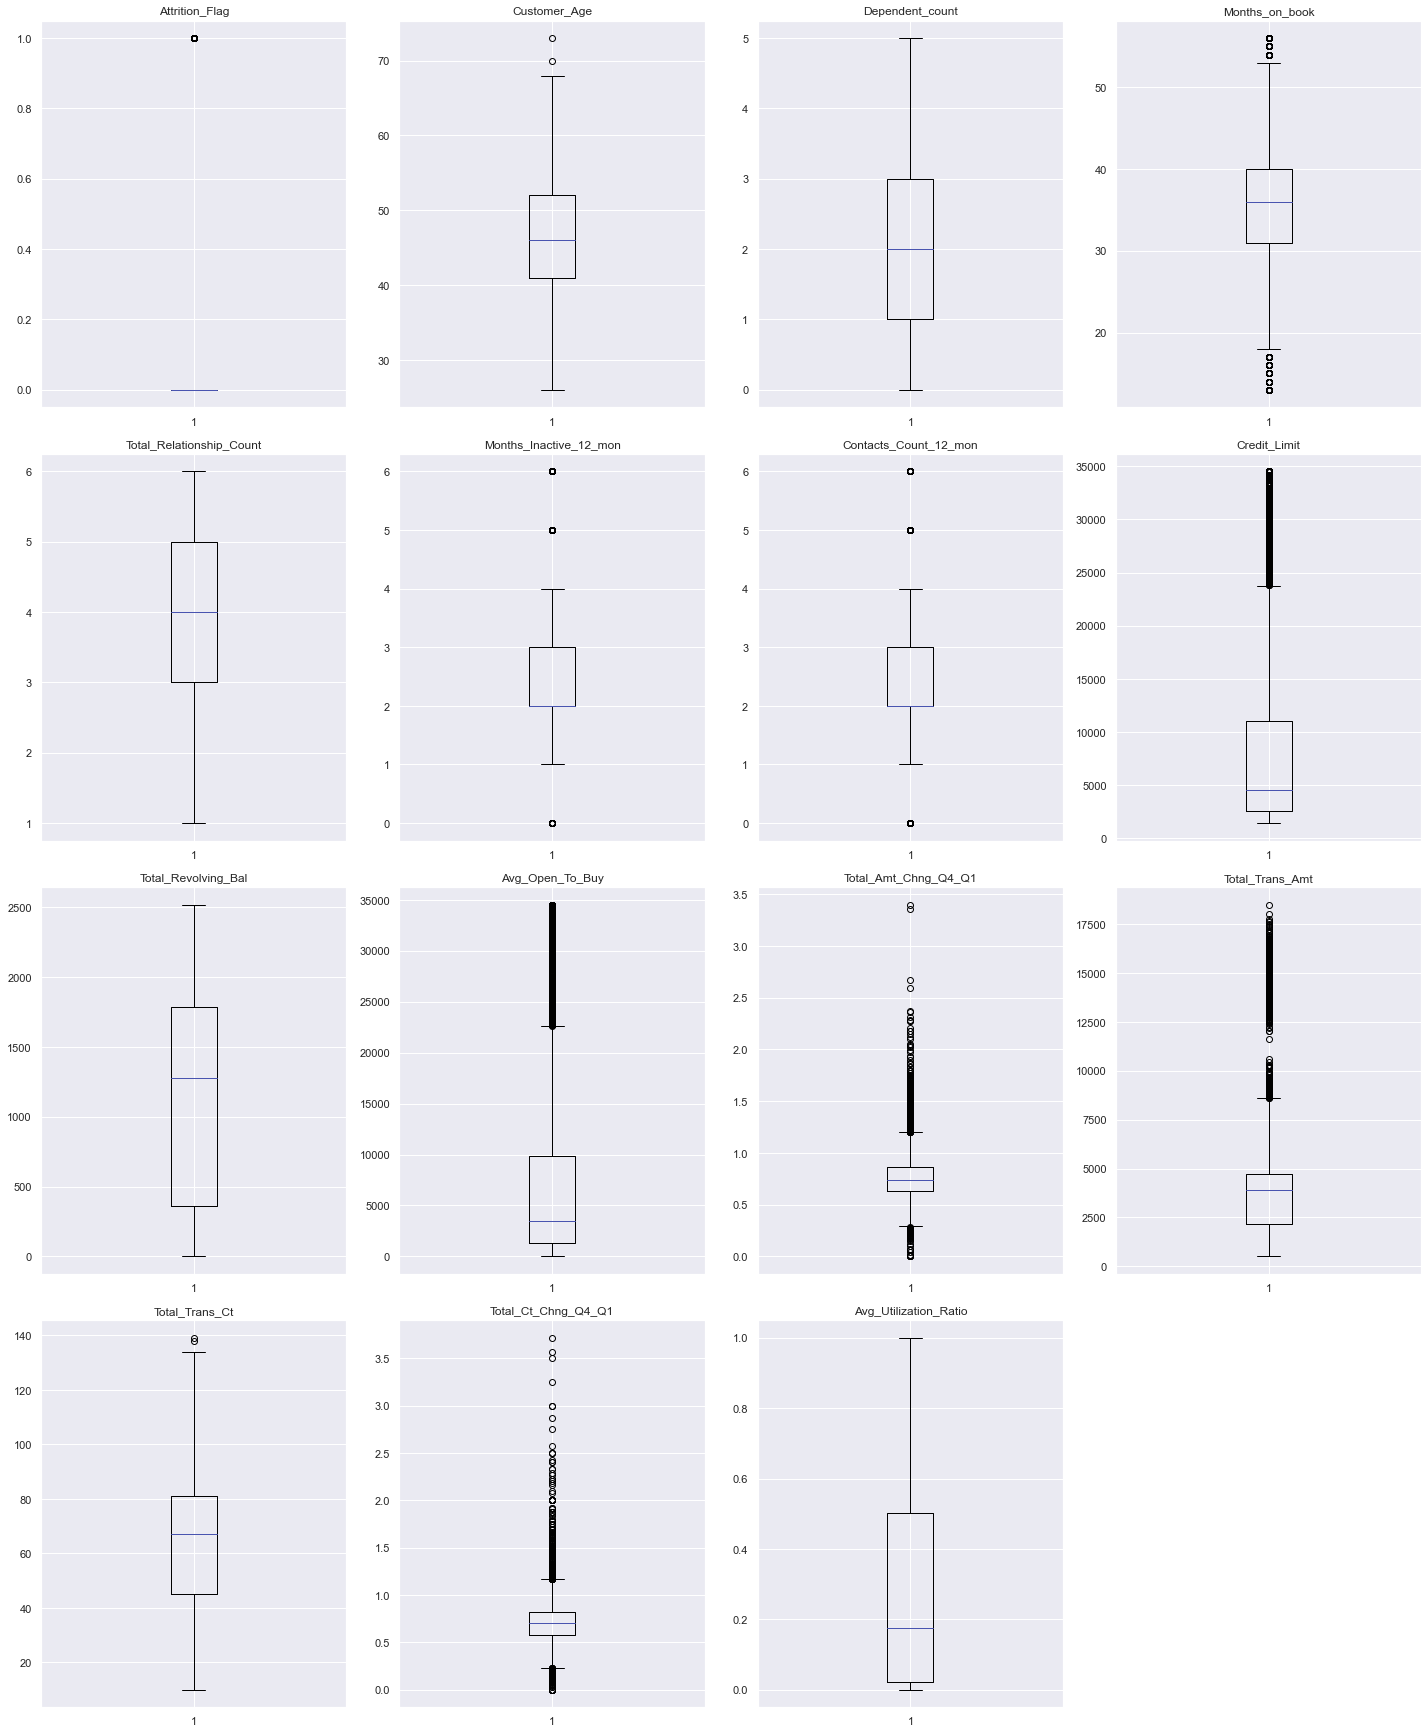

In [81]:
#Cite reference:  from Life Expectancy Case Stdy
# outlier detection aggregated in one spot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* The classification model types are fairly resilient to outliers.  Going to not treat them with a flooring or capping approach yet, but it does indicate the I need to use a scaling approach during model building given the level of skewness.  StandardScaler is best suited for this level of skewness in data.

# <a id = "link4"></a> 4. Model Building & 5. Model Tuning (integrated)

* Model Tuning = Model performance improvement via Hyperparameter Tuning


## Split the Data into Training and Test Sets

* using stratified sampling to preserve relative class frequencies are maintained in train and test data sets.

In [82]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition_Flag',axis=1)     # Predictor feature columns
y = df['Attrition_Flag']   # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29, stratify = y)
# using 29 as the random seed
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(7088, 19) (3039, 19)
(7088,) (3039,)


In [83]:
df['Attrition_Flag'].describe().T

count    10127.000000
mean         0.160660
std          0.367235
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Attrition_Flag, dtype: float64

### check the split of the training and test data

In [84]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

69.99% data is in training set
30.01% data is in test set


* 70% - 30% split on train - test sets

### one-hot encode categorical variables

In [85]:
# need to one-hote encode Categorical columns

#cat_cols =['Gender','Education_Level','Marital_Status',
 #         'Income_Category', 'Card_Category']
#dummy_data = pd.get_dummies(df, columns=cat_cols,drop_first=True)

#dummy_data.head();


X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 32) (3039, 32)


### check true : false ratio for Attrition_Flag (i.e., 0=false "acct stayed open", 1 = true "account closed")

In [86]:
print("Original Attrition_Flag True Values : {0} ({1:0.2f}%)".format(len(df.loc[df['Attrition_Flag'] == 1]), (len(df.loc[df['Attrition_Flag'] == 1])/len(df.index)) * 100))
print("Original Attrition_Flag False Values: {0} ({1:0.2f}%)".format(len(df.loc[df['Attrition_Flag'] == 0]), (len(df.loc[df['Attrition_Flag'] == 0])/len(df.index)) * 100))
print("")
print("Training Attrition_Flag True Values : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Attrition_Flag False Values: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Attrition_Flag True Values     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Attrition_Flag False Values    : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Attrition_Flag True Values : 1627 (16.07%)
Original Attrition_Flag False Values: 8500 (83.93%)

Training Attrition_Flag True Values : 1139 (16.07%)
Training Attrition_Flag False Values: 5949 (83.93%)

Test Attrition_Flag True Values     : 488 (16.06%)
Test Attrition_Flag False Values    : 2551 (83.94%)



* I want to preserve the balance of True and False for our predictor variable between train and test sets

### predictor variable is severely imbalanced, explore undersampling and oversampling using SMOTE


In [87]:
from imblearn.over_sampling import SMOTE

### oversampling  : create oversampled training sets

In [88]:
y_train.dtype

dtype('int64')

In [89]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=29)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 32)
After UpSampling, the shape of train_y: (11898,) 



### undersampling  : create undersampled training sets

In [90]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [91]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 32)
After Under Sampling, the shape of train_y: (2278,) 



## Model evaluation criteria

1 = "Yes" or "the account is closed", i.e., "they leave"
0 = "No" or "the account remains open", i.e., "they stay" 


True Positive (TP)  is:  

Predict they will leave and they leave.  Predict = Y, Actual = Y

False Positive (FP)  is:

Predict they will leave and they do not leave.  Predict = Y, Actual = N

True Negative (TN)  is:

Predict they will not leave and they do not leave.  Predict = N, Actual = N

False Negative (FN)  is:  

Predict they will not leave and they do leave.  Predict = N, Actual = Y


1.  Identify where the Model can fail and the impact to the business user:
    * Predicting that the customer WILL leave the Credit Card company and they do not leave.  (FP)
    
    * Predicting that the customer WILL NOT leave the Credit Card company and they actually do leave. (FN)

2.  Which of the Model failure mode is more impacting to the business user?

    * Will the business user be hurt more if they expect a certain level of customer retention and customer leave (FN), or by predicting a customer will leave and they actually do not leave (FP) (i.e., an upside in customer retention?)

    * The downside of predicting customers will stay and they end up leaving could be making business decisions around investments based on a higher level of revenue than what actually materializes resulting in profitability loss and other negative impacts to the business.

    * The downside of predicting a customer will leave and they stay is minimally impactful.  In fact it is upside and will provide more actionable insights into their marketing efforts and will provide a basis for model improvement.  
    

3. So, model performance will be centered around minimizing False Negatives.  Therefore we will use Recall.  The higher the Recall, the better. 

****  Maximizing recall will minimize the false-negative errors.Maximizing precision will minimize the false-positive errors. The F-measure is charmonic mean of precision and recall, giving each the same weighting. (ref: https://machinelearningmastery.com/fbeta-measure-for-machine-learning/)




### run model pipelines for imbalanced, undersampled, and oversampled test-training splits

In [92]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=29,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=29)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 59.348867764123966
RF: 78.31710333101476
GBM: 84.10966844423837
ADB: 84.45899992271426
XGB: 87.70886467269496
DTREE: 81.30110518587216


### oversampling

In [93]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=29,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=29)),
            ]
        ),
    )
)

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=29
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 91.88095355888362
RF: 98.43677689747052
GBM: 97.29376426769193
ADB: 96.58766988713063
XGB: 98.55438155077
DTREE: 95.37734555554769


* oversampling produces noticably higher CV results

### undersampling

In [94]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=29)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=29,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=29)),
            ]
        ),
    )
)

results_under = []  # Empty list to store all model's CV scores
names_under = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=29
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results_under.append(cv_result)
    names_under.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 85.07380786768684
RF: 94.29476775639539
GBM: 95.08424144060591
ADB: 93.67880052554293
XGB: 95.69673081381869
DTREE: 90.07844501120644


* undersampling has good results, but oversampling is better.

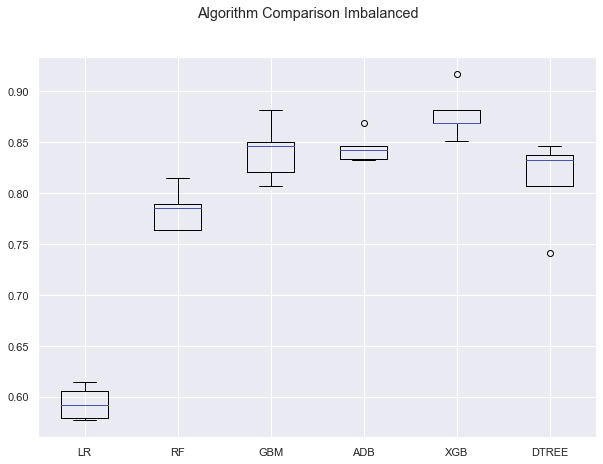

In [95]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison Imbalanced")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

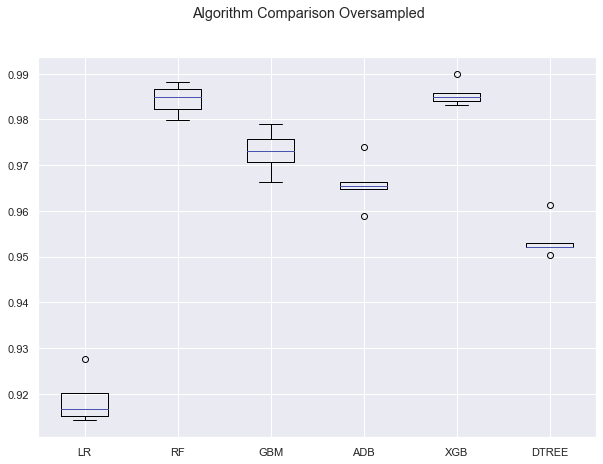

In [96]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison Oversampled")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

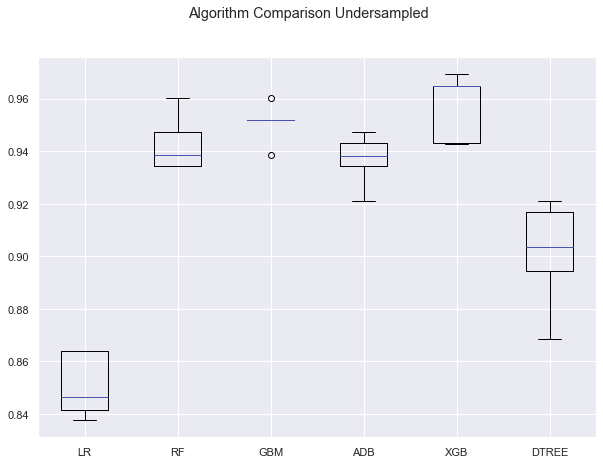

In [97]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison Undersampled")
ax = fig.add_subplot(111)

plt.boxplot(results_under)
ax.set_xticklabels(names_under)

plt.show()

### observations

* oversampling with RF and XGB are the highest CV result models.  Will move to Scoring and Tuning

# Hyperparameter Tuning

* Use the Oversampled training data set

* explore tuning using GridSearchCV and RandomSearchCV 

* select the best parameters and then evaluate the model performance with Recall as our eval metric

In [98]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
## Using oversampling training data set
def get_metrics_score(model, flag=True):
 

    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train_over)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train_over, y_train_over)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train_over, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train_over, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train_over, y_train_over))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train_over, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train_over, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [99]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


# XGBoost


will run GridSearchCV and RandomSearchCV to find best hyperparameters for XGB

### GridSearchCV

In [100]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=29,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.5], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 3, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.989915825034808:
CPU times: user 14h 25min 6s, sys: 8min 12s, total: 14h 33min 19s
Wall time: 1h 54min 41s


In [117]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=29,
        n_estimators=250,
        scale_pos_weight=10,
        subsample=0.7,
        learning_rate=0.01,
        gamma=3,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=8, num_parallel_tree=1, random_state=29,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9313329971423768
Accuracy on test set :  0.882856202698256
Recall on training set :  0.9994957135653051
Recall on test set :  0.9733606557377049
Precision on training set :  0.8795857988165681
Precision on test set :  0.5806845965770171


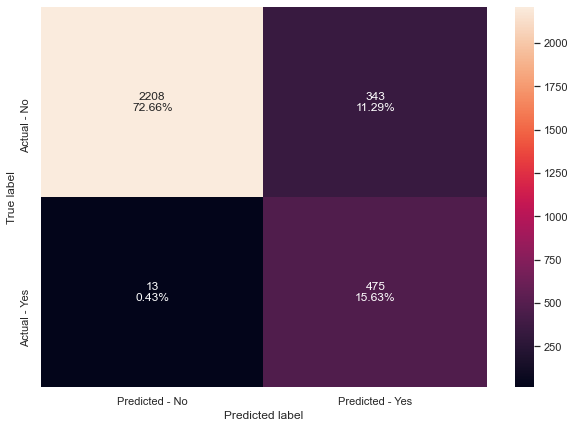

In [118]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

### observation

* GridSearchCV tuned hyperparameters used to improve the model performance is still yielding overfitting.

* The processing time for GridSearchCV is significant.





### RandomSearchCV

In [103]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=29,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in RandomSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.5],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=29)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.7, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 0} with CV score=0.999327731092437:
CPU times: user 26min 4s, sys: 22.4 s, total: 26min 26s
Wall time: 3min 33s


In [119]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=29,
                n_estimators=250,
                scale_pos_weight=10,
                gamma=3,
                subsample=0.7,
                learning_rate= 0.01,
                eval_metric='logloss', max_depth = 2, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train_over, y_train_over)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=8, num_parallel_tree=1, random_state=29,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.783661119515885
Accuracy on test set :  0.6584402764067128
Recall on training set :  0.9998319045217684
Recall on test set :  0.9959016393442623
Precision on training set :  0.6980401361342565
Precision on test set :  0.3193166885676741


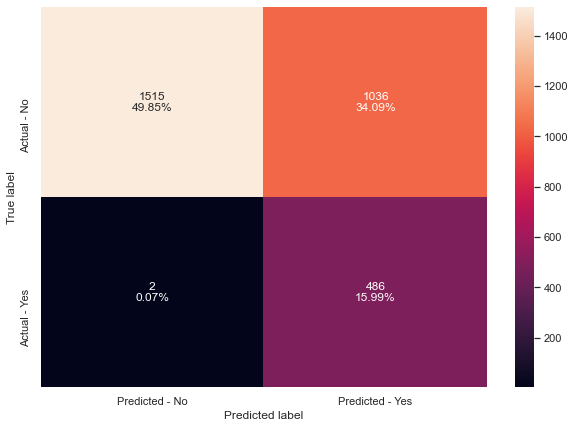

In [120]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

### observation

* RandomSearchCV tuned hyperparameters used to improve the model performance is still yielding overfitting.

* The processing time for RandomSearchCV is much lower as compared to GridSearchCV. 



# Random Forest Model Building

## GridSearchCV

In [106]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
sorted(pipeline.get_params().keys())

['memory',
 'randomforestclassifier',
 'randomforestclassifier__bootstrap',
 'randomforestclassifier__ccp_alpha',
 'randomforestclassifier__class_weight',
 'randomforestclassifier__criterion',
 'randomforestclassifier__max_depth',
 'randomforestclassifier__max_features',
 'randomforestclassifier__max_leaf_nodes',
 'randomforestclassifier__max_samples',
 'randomforestclassifier__min_impurity_decrease',
 'randomforestclassifier__min_impurity_split',
 'randomforestclassifier__min_samples_leaf',
 'randomforestclassifier__min_samples_split',
 'randomforestclassifier__min_weight_fraction_leaf',
 'randomforestclassifier__n_estimators',
 'randomforestclassifier__n_jobs',
 'randomforestclassifier__oob_score',
 'randomforestclassifier__random_state',
 'randomforestclassifier__verbose',
 'randomforestclassifier__warm_start',
 'standardscaler',
 'standardscaler__copy',
 'standardscaler__with_mean',
 'standardscaler__with_std',
 'steps',
 'verbose']

In [107]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=29))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": np.arange (50,300,50),
    "randomforestclassifier__min_samples_leaf": np.arange (1,6,1),
    "randomforestclassifier__max_features": [0.7,0.9,'log2','auto'],
    "randomforestclassifier__max_samples":[0.7,0.9, None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_features': 0.7, 'randomforestclassifier__max_samples': 0.9, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 150} 
Score: 0.8568707009815288
CPU times: user 45min 40s, sys: 22.7 s, total: 46min 3s
Wall time: 46min 21s


In [108]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=29,
        max_features=0.7,
        max_samples=0.9,
        min_samples_leaf=1,
        n_estimators=150,
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.7, max_samples=0.9,
                                        n_estimators=150, random_state=29))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9532741033234616
Recall on training set :  1.0
Recall on test set :  0.8831967213114754
Precision on training set :  1.0
Precision on test set :  0.8352713178294574


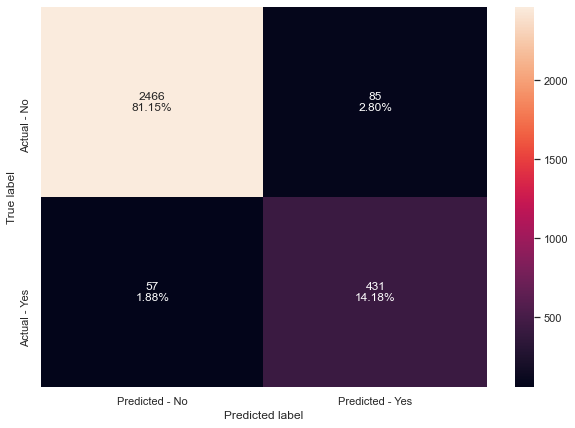

In [109]:
# Calculating different metrics
get_metrics_score(rf_tuned1)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

### observation

* GridSearchCV tuned hyperparameters used to improve the model performance is still yielding overfitting.

* The processing time for GridSearchCV is much faster on RandomForest as compared to XGBoost.  



### RandomSearchCV

In [110]:
%%time 
# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=29))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": np.arange (50,300,50),
    "randomforestclassifier__min_samples_leaf": np.arange (1,6,1),
    "randomforestclassifier__max_features": [0.7,0.9,'log2','auto'],
    "randomforestclassifier__max_samples":[0.7,0.9, None]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=29)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 150, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_samples': 0.7, 'randomforestclassifier__max_features': 0.7} with CV score=0.9744525093468843:
CPU times: user 13min 17s, sys: 6.31 s, total: 13min 23s
Wall time: 13min 27s


In [121]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=29,
        max_features=0.7,
        max_samples=0.7,
        min_samples_leaf=1,
        n_estimators=150,
    ),
)

# Fit the model on training data
rf_tuned2.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.7, max_samples=0.7,
                                        n_estimators=150, random_state=29))])

Accuracy on training set :  0.9992435703479576
Accuracy on test set :  0.9509707140506746
Recall on training set :  0.9991595226088418
Recall on test set :  0.8770491803278688
Precision on training set :  0.9993275050437121
Precision on test set :  0.8278529980657641


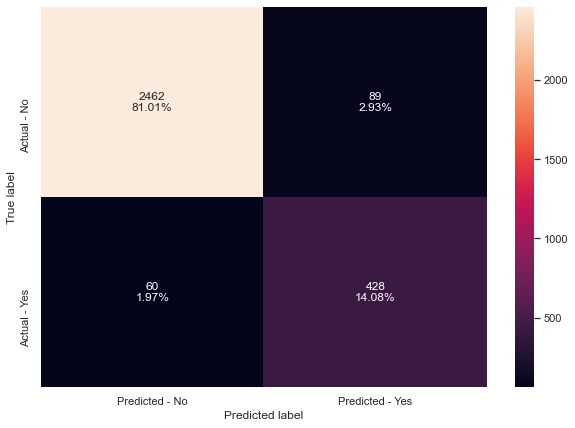

In [122]:
# Calculating different metrics
get_metrics_score(rf_tuned2)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

# <a id = "link6"></a> 6. Compare all models and evaluate

In [123]:
# defining list of models
models = [xgb_tuned1, xgb_tuned2, rf_tuned1, rf_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [124]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "RandomForest with GridSearchCV",
            "RandomForest with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
1       XGBoost with RandomizedSearchCV        0.783661       0.658440   
0             XGBoost with GridSearchCV        0.931333       0.882856   
2        RandomForest with GridSearchCV        1.000000       0.953274   
3  RandomForest with RandomizedSearchCV        0.999244       0.950971   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
1      0.999832     0.995902         0.698040        0.319317  
0      0.999496     0.973361         0.879586        0.580685  
2      1.000000     0.883197         1.000000        0.835271  
3      0.999160     0.877049         0.999328        0.827853

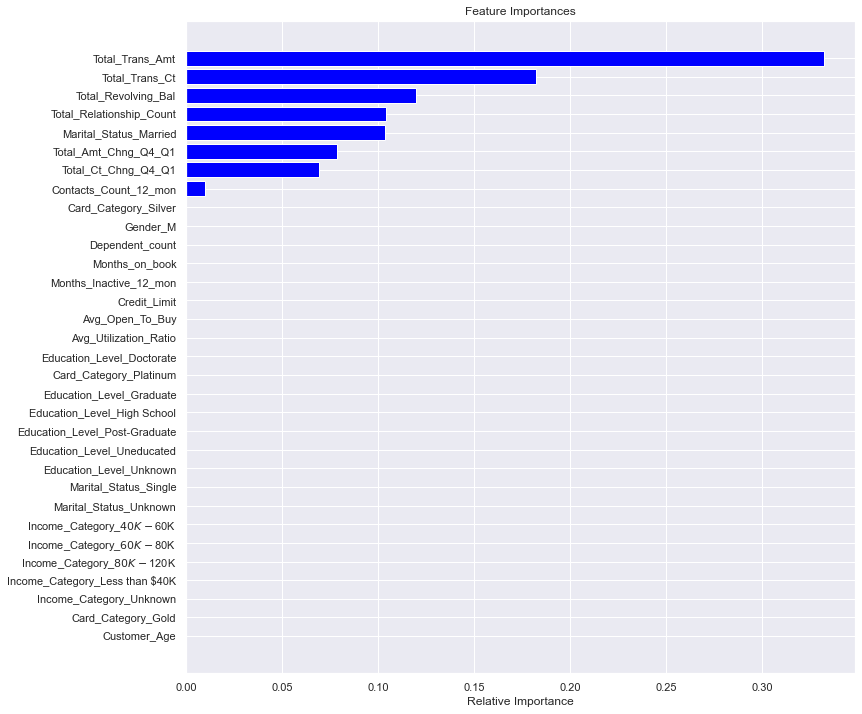

In [125]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# <a id = "link7"></a> 7.  Summary and Conclusions










Credit card companies make their money in 2 primary ways.

They make money on transactions as a percentage of the total transaction value, and then they make money on customers paying interest charges on their revolving balances.  In addition to acquiring new customers, the Credit Card company needs to retain customers, increase their card usage, and have them carry higher revolving balances.  A customer who fits all these categories is ideal. 


Three of the the strongest factors to influence customer attrition are a Customers Total_Trans_Amt, Total_Trans_Ct, and Total_Revolving_Bal.

These three features are all positively correlated.  The majority of customers who leave, only spend around USD 2,000 pa and have about 50 transactions pa, and while some will max out their card, the upper quartile of those who stay (75%) is about USD 1,000 higher in the last 12 months.

The company should focus on understanding why these customers leave.  They are categorically different from those who stay.  

The next most influential feature is Total_Relationship_Count.    Customers who stay with the company tend to take more products.  This is an early indicator of customer attrition.   The Company should tailor marketing campaigns to encourage more and more product adoption to encourage retention.  A customer’s Marital Status will be equally influential.  This is incongruent however with EDA which shows no meaningful difference in attrition based on marital status.  This is where we start to reveal the breakdown in the model when applied to unseen data.

The model overall is overfit regardless of tuning.  While it performs well on training data, when migrating to unseen data it will ultimately breakdown in production.  

Need more time to explore different modeling techniques.

There were also decisions that I made early on that should be revisited:

1. Should I have dealt with outliers by possibly applying a flooring and capping method?  With more time I would explore this.

2.   Additionally, there are categories such as “unknown” for marital status that could have been treated as a non-obvious missing data.  

3.  Hyperparameter tuning for GridSeearchCV and RandomSearchCV for XGBoost yielded the same “best parameters”…this is not intuitive.  RandomSearchCV should outperform GridSearchCV hueristically.  Need more time to explore the parameter grid and run Hyperparameter tuning over and over until we see the overfitting significantly reduced.
